<a href="https://colab.research.google.com/github/jeans-all/2025_youtube_music_analysis/blob/main/youtube_music_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

try:
  !mkdir -p "/content/drive/MyDrive/data_projects/youtube_music/data"
  !mkdir -p "/content/drive/MyDrive/data_projects/youtube_music/notebooks"
  !mkdir -p "/content/drive/MyDrive/data_projects/youtube_music/outputs"
except Error:
  print("Directories already exist")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette('husl')

# Read CSV file from the mounted drive
df = pd.read_csv('/content/drive/My Drive/data_projects/youtube_music/data/youtube-top-100-songs-2025.csv', engine='python')

# Test data load
print("Setup Complete!")
print(f"Dataset Shape: {df.shape}")
print(f'Columns: {df.dtypes}')
print("\n📊 First 5 Rows:")
display(df.head(1))

Setup Complete!
Dataset Shape: (100, 13)
Columns: title                     object
fulltitle                 object
description               object
view_count                 int64
categories                object
tags                      object
duration                   int64
duration_string           object
live_status                 bool
thumbnail                 object
channel                   object
channel_url               object
channel_follower_count     int64
dtype: object

📊 First 5 Rows:


,title,fulltitle,description,view_count,categories,tags,duration,duration_string,live_status,thumbnail,channel,channel_url,channel_follower_count
0,ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT.\nDownload/stream: ht...,2009014557,Music,YG Entertainment;YG;와이지;K-pop;BLACKPINK;블랙핑크;블...,173,2:53,False,https://i.ytimg.com/vi_webp/ekr2nIex040/maxres...,ROSÉ,https://www.youtube.com/channel/UCBo1hnzxV9rz3...,19200000


## 1. Exploratory Data Analysis: Channel Performance Overview

### Objective
Understand which channels dominate the YouTube Music Top 100 and identify patterns in their success metrics.

### What We'll Analyze
- **Top 10 channels** by cumulative view count
- **Content volume**: How many songs each channel placed in the Top 100
- **Efficiency**: Average views per video by channel
- **Audience base**: Channel follower counts for context

This establishes baseline understanding of the competitive landscape before deeper analysis.

In [3]:
# Analysis Request 1

# 1. Top 10 channels by total view count (sum of all their videos in top 100)
topTen = df.groupby('channel').sum('view_count').nlargest(10, 'view_count')

# 2. Number of songs each channel has in the top 100
countSongs = df.groupby('channel')['title'].nunique().sort_values(ascending=False)

# 3. Average views per video for each channel
avgViews = df.groupby('channel')['view_count'].mean()

# 4. Channel follower count for context
followers = df.groupby('channel')['channel_follower_count'].max()

topTenDominance = topTen['view_count'].sum()/df['view_count'].sum()*100
channelWithMostViews = topTen.index[0], topTen.iloc[0]['view_count']
channelWithHightestAvgView = df.groupby('channel', observed=True).agg({'view_count':'mean', 'fulltitle':'nunique'}).nlargest(3, 'view_count')

if True:
  print(channelWithHightestAvgView.head(10))
  print(avgViews.head(10))
  print(followers.head(10))
  print(countSongs.head(10))
  print(topTen)


             view_count  fulltitle
channel                           
ROSÉ       7.468471e+08          3
Lady Gaga  5.206774e+08          3
Shaboozey  2.882779e+08          1
channel
Addison Rae          3.521194e+07
Alex Warren          1.002985e+08
Ariana Grande        1.870580e+07
Benson Boone         5.785307e+07
Billie Eilish        2.490799e+08
C'zah                1.208900e+04
Chappell Roan        1.180771e+08
Charli xcx           7.900281e+07
Chxnny               6.605000e+03
Claudia Valentina    6.678460e+05
Name: view_count, dtype: float64
channel
Addison Rae           4350000
Alex Warren           4050000
Ariana Grande        56400000
Benson Boone          5360000
Billie Eilish        56800000
C'zah                    1320
Chappell Roan         2250000
Charli xcx            3900000
Chxnny                   3630
Claudia Valentina       23900
Name: channel_follower_count, dtype: int64
channel
Sabrina Carpenter    7
Tate McRae           4
ROSÉ                 3
Billie Eilish   

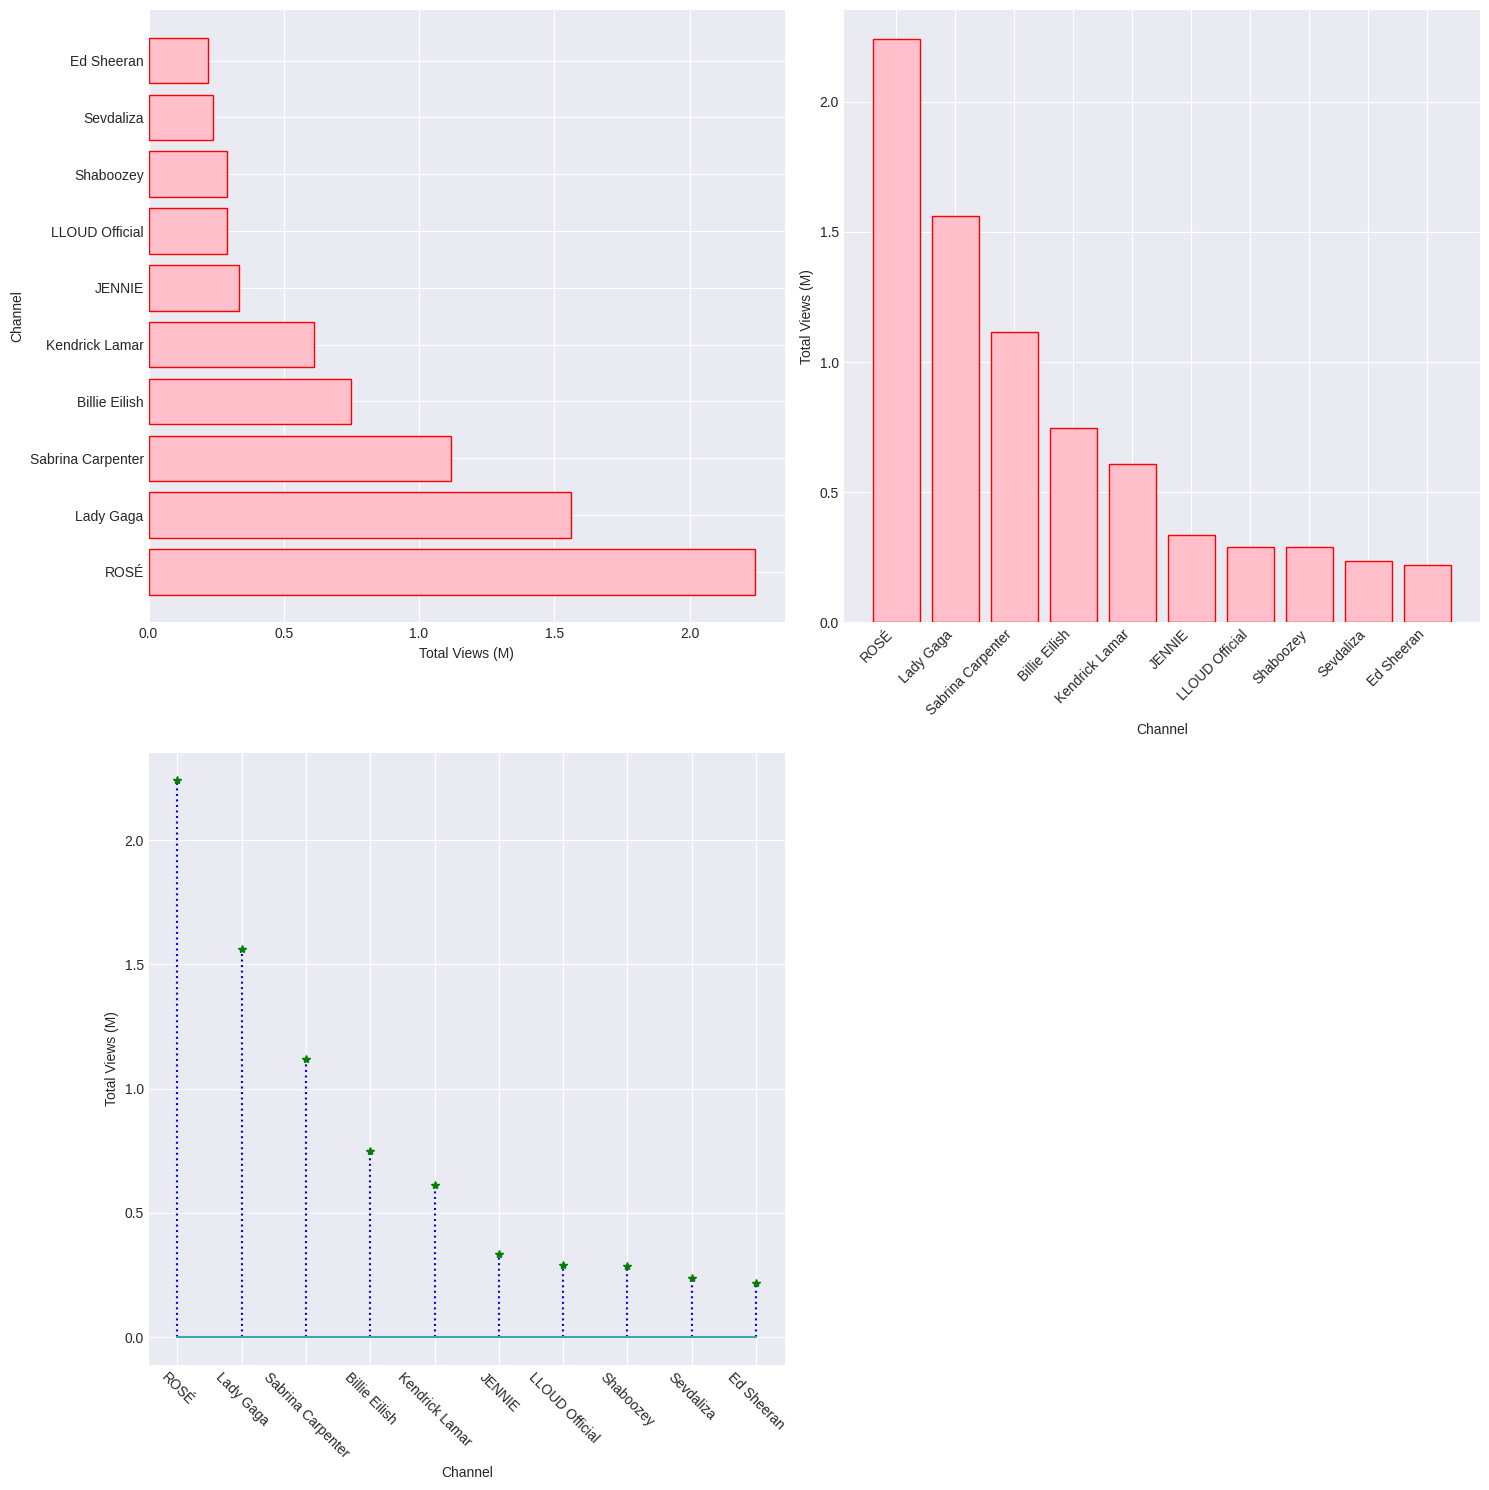

In [4]:
# 1. Top 10 channels by total view count (sum of all their videos in top 100)
from matplotlib.ticker import FormatStrFormatter, ScalarFormatter, FuncFormatter

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=[15, 15])

# 1. horizontal bar char
hBars = ax1.barh(topTen.index, topTen['view_count'], height=0.8, edgecolor='red', color='pink', linewidth=1)

formatter = FuncFormatter(lambda x, y: f'{x/1e9}')
ax1.xaxis.set_major_formatter(formatter)

ax1.set_xlabel('Total Views (M)')
ax1.set_ylabel('Channel')

# 2. Vertical Bar Chart
vBars = ax2.bar(topTen.index, topTen['view_count'], width=0.8, edgecolor='red', color='pink', linewidth=1)
ax2.yaxis.set_major_formatter(formatter)

ax2.set_ylabel('Total Views (M)')
ax2.set_xlabel('Channel')

ax2.set_xticks(topTen.index)
ax2.set_xticklabels(labels = topTen.index, rotation=45, ha='right')


# 3. Lollipop Chart
x_positions = range(len(topTen))
lollipop = ax3.stem(x_positions, topTen['view_count'], markerfmt='g*', linefmt="b:")

ax3.set_xticks(x_positions)
ax3.set_xticklabels(labels=topTen.index, rotation=-45, ha='center')
ax3.yaxis.set_major_formatter(formatter)
ax3.set_xlabel('Channel')
ax3.set_ylabel('Total Views (M)')

ax4.remove()

plt.tight_layout()
plt.show()


In [5]:
!pip install squarify -qqq
import squarify


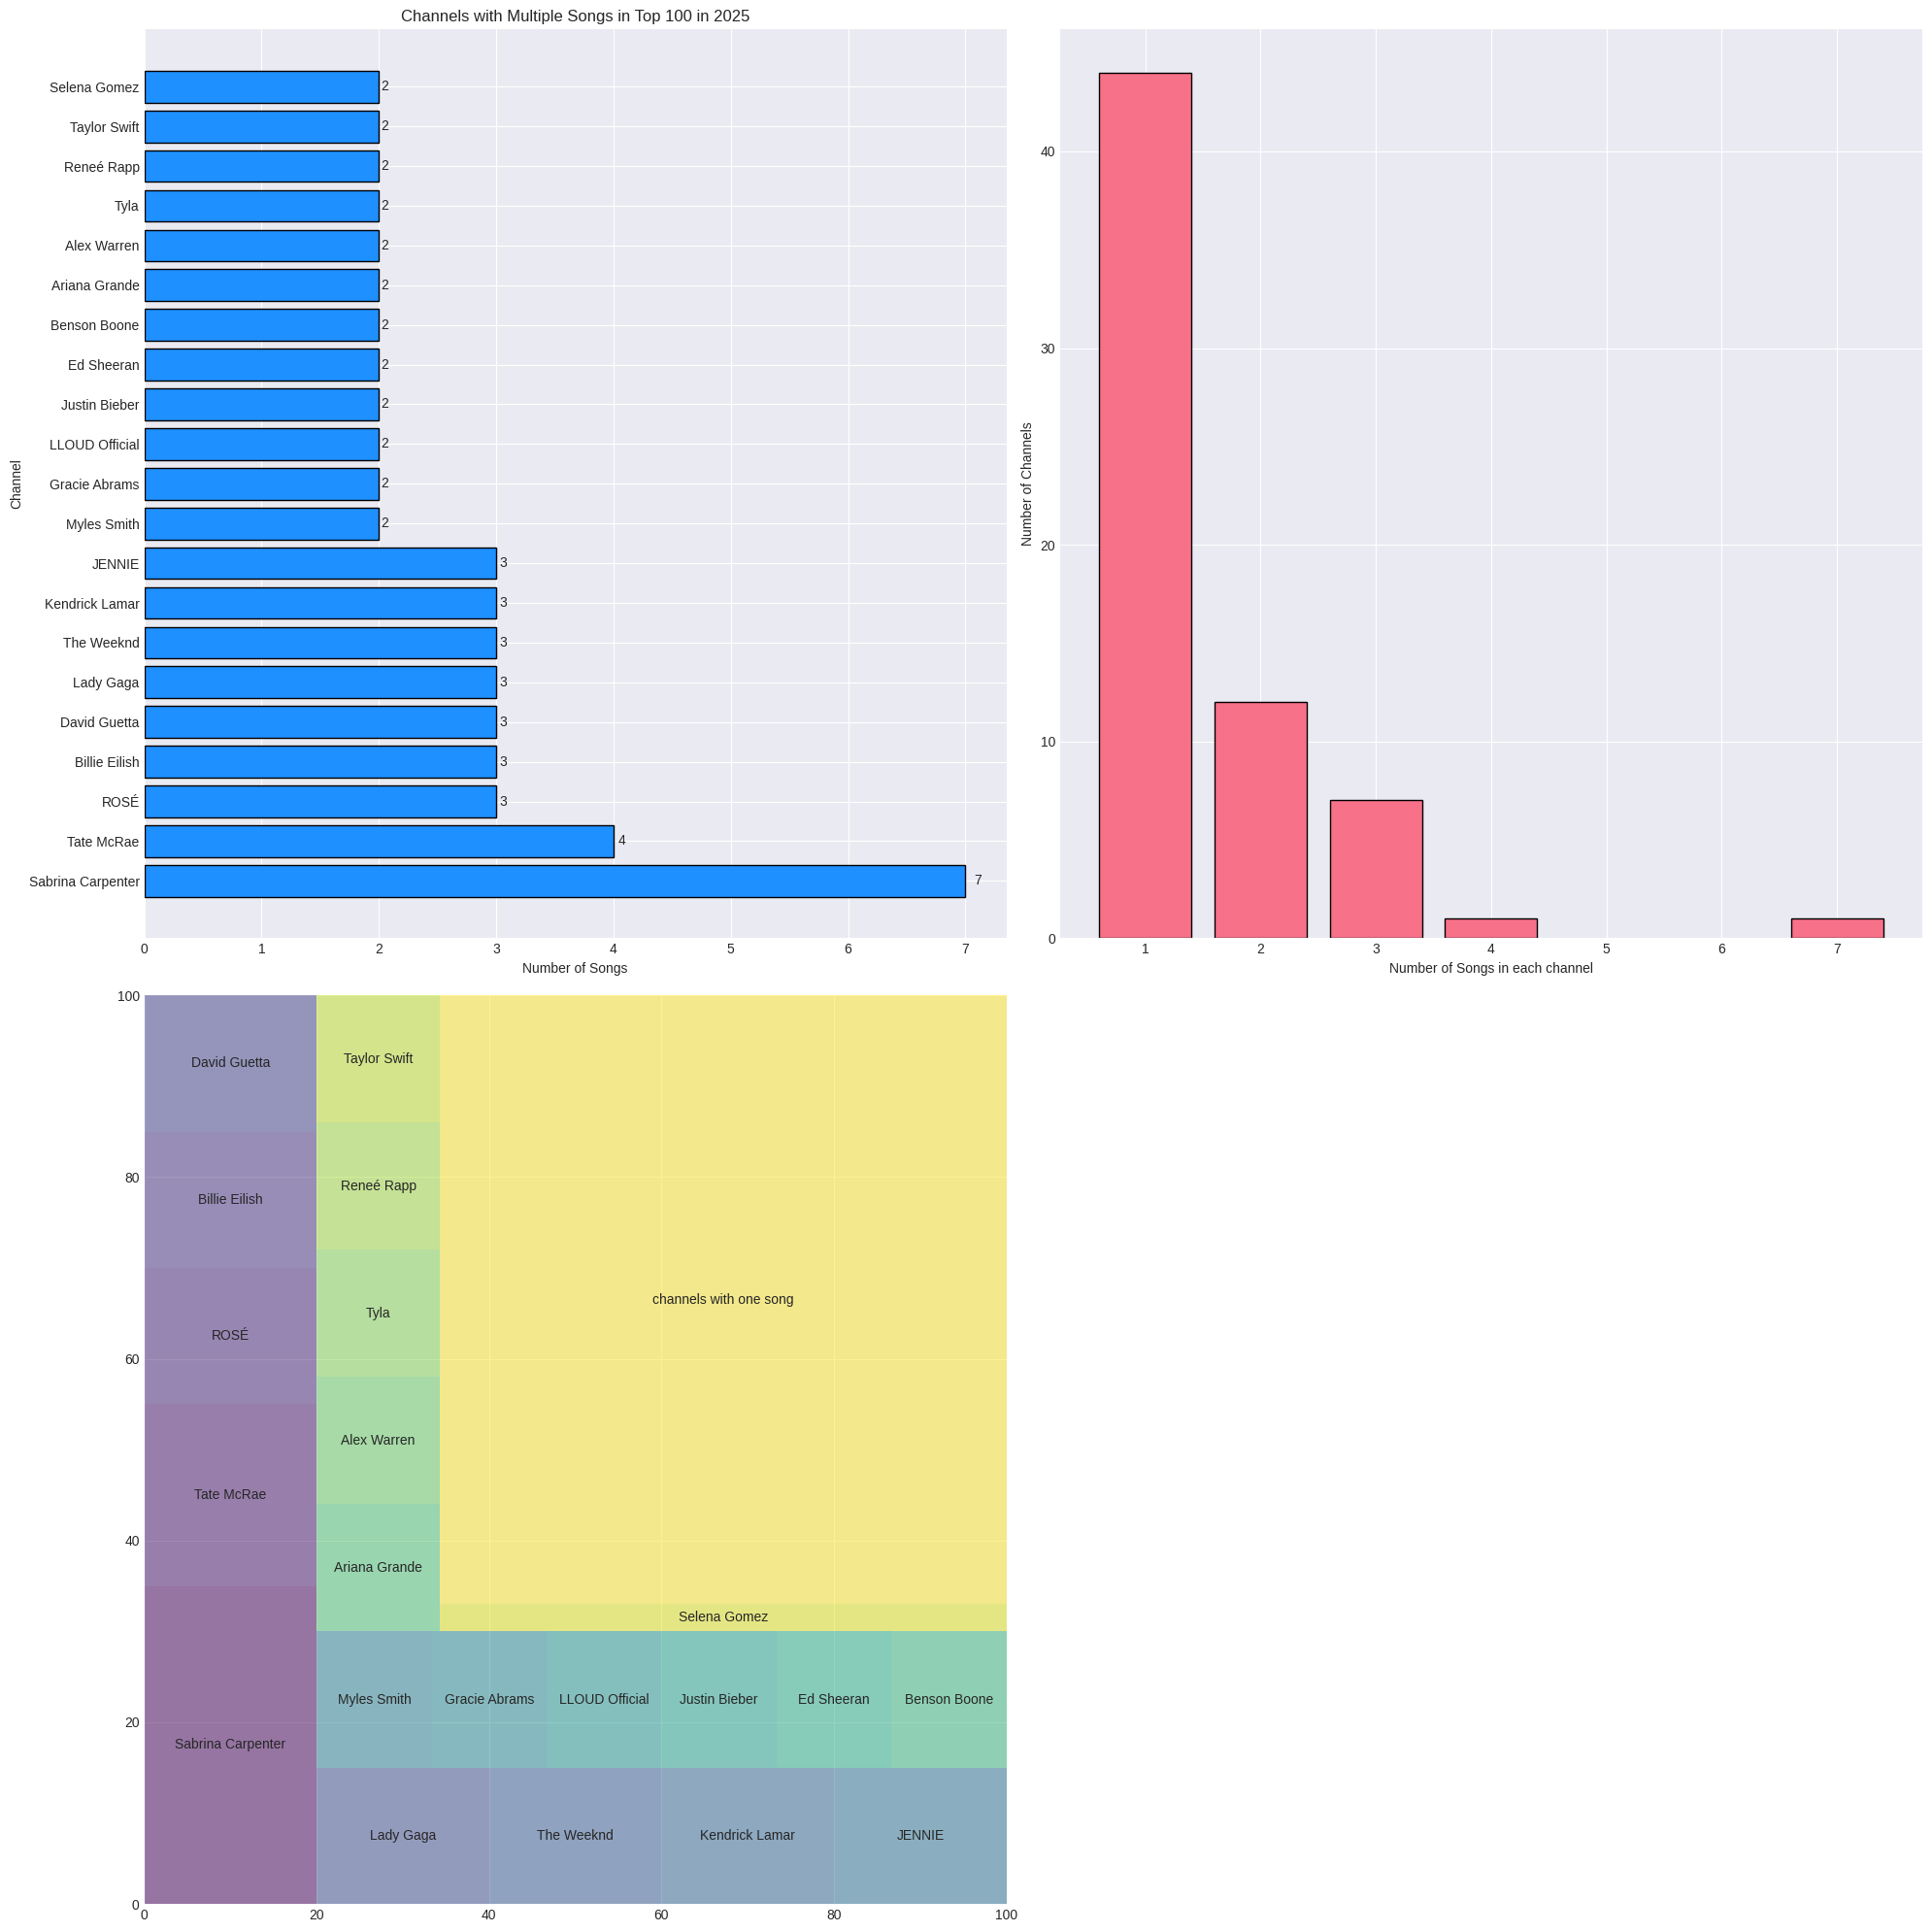

In [6]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=[20, 20])

# 1. Horizontal Bar Chart (Most Recommended)
# Perfect for showing count data with many categories
# Especially useful if you want to show top 10-20 channels

countSongsThanTwo = countSongs[countSongs>1]
hBars = ax1.barh(countSongsThanTwo.index, countSongsThanTwo, facecolor='dodgerblue', ec='black')

for bar in hBars:
  width = bar.get_width()
  ax1.text(width*1.01, bar.get_y() + bar.get_height()/2, f'{int(width)}', ha='left', va='center')

ax1.set_ylabel('Channel')
ax1.set_xlabel('Number of Songs')
ax1.set_title('Channels with Multiple Songs in Top 100 in 2025')

# 2. Histogram or Bar Chart with Grouped Ranges
# Shows distribution: "How many channels have 1 song, 2 songs, 3+ songs?"
# Good for understanding the overall pattern
# Example: Most channels have only 1 song, few have multiple

songAggr = countSongs.value_counts().sort_index()
bars = ax2.bar(songAggr.index, songAggr.values, edgecolor='black', linewidth=1)

ax2.set_xlabel("Number of Songs in each channel")
ax2.set_ylabel("Number of Channels")

# 3. Treemap
# Visual representation of proportions
# Larger rectangles = more songs
# Good for showing dominance of certain channels

countSongs_copy = countSongs.copy()
countSongs_copy['channels with one song'] = len(countSongs_copy[countSongs_copy==1])
countSongs_copy = countSongs_copy[countSongs_copy>1]

from matplotlib import colormaps, colors
songCounts = countSongs_copy.values
songs = countSongs_copy.index

colors = plt.cm.viridis(np.linspace(0, 1, len(countSongs_copy)))
squarify.plot(sizes = songCounts, label=songs, color=colors, alpha=0.5, ax=ax3)
ax4.remove()

plt.tight_layout()
plt.show()



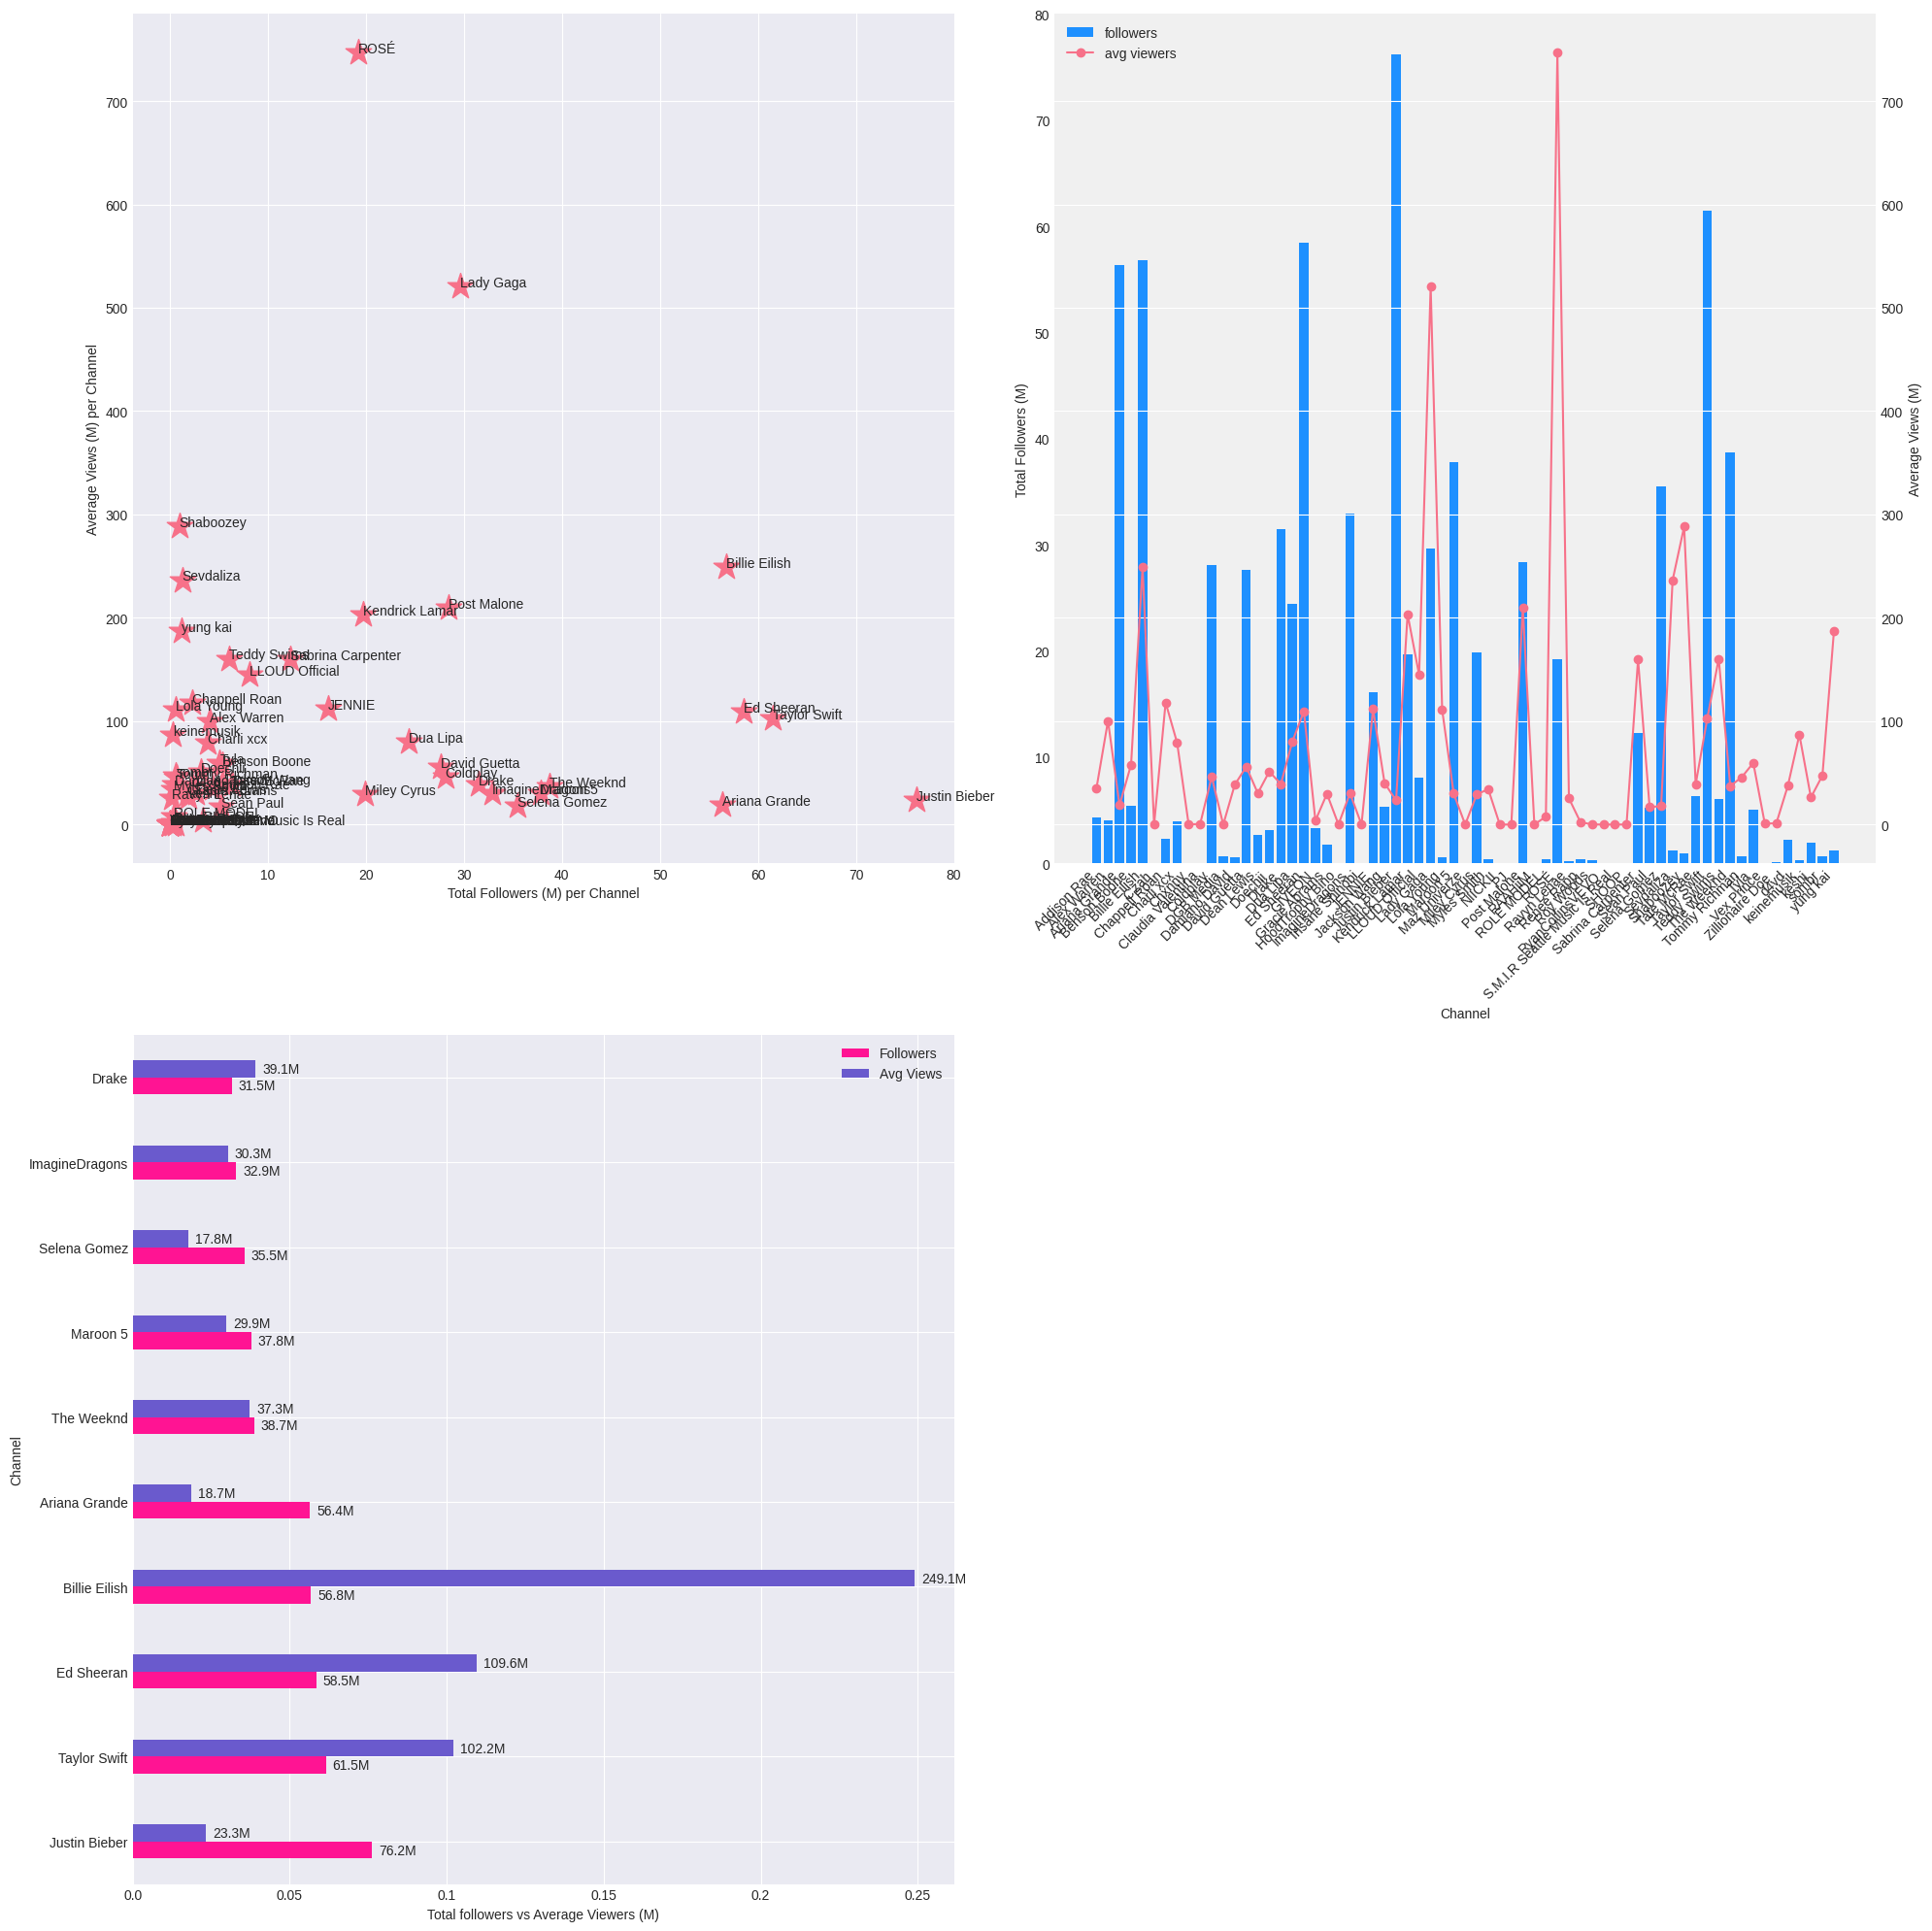

In [7]:

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=[20, 20])

# 1
scatter = ax1.scatter(followers.values, avgViews.values, s=400, marker= '*')

ax1.set_xlabel('Total Followers (M) per Channel')
ax1.set_ylabel('Average Views (M) per Channel')

ax1.xaxis.set_major_formatter(lambda x, p: f'{int(x/1000000)}')
ax1.yaxis.set_major_formatter(lambda x, p: f'{int(x/1000000)}')

for i, v in enumerate(followers.values):
  ax1.annotate(followers.index[i], xy=(v, avgViews.values[i]))


# 2
bars = ax2.bar(followers.index, followers.values, color='dodgerblue', label='followers')
ax2_twin = ax2.twinx()

ax2.set_xlabel('Channel')
ax2_twin.set_ylabel('Average Views (M)')
ax2.set_ylabel('Total Followers (M)')

ax2_twin.plot(avgViews.index, avgViews.values, marker='o', label='avg viewers')

ax2.yaxis.set_major_formatter(lambda x, p: int(x/1000000))
ax2_twin.yaxis.set_major_formatter(lambda x, p: int(x/1000000))

lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_twin.get_legend_handles_labels()

ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left', framealpha=0.9)

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.set_facecolor('#f0f0f0')
ax2.grid(False)

# 3
topTenFollowers = followers.nlargest(10)
topTenAvgViews = avgViews.loc[topTenFollowers.index]

width = 0.2
offset = width/2

y_pos = np.arange(len(topTenFollowers))

hBarF = ax3.barh(y_pos-offset, topTenFollowers.values, height=width, label='Followers', facecolor='deeppink')
ax3_twin = ax3.twinx()
hBarAvg = ax3_twin.barh(y_pos+offset, topTenAvgViews.values, height=width, label='Avg Views', facecolor='slateblue')

ax3.set_ylim(-0.5, len(topTenFollowers) - 0.5)
ax3_twin.set_ylim(-0.5, len(topTenFollowers) - 0.5)

ax3.set_yticks(y_pos)
ax3.set_yticklabels(topTenFollowers.index)

# For ax3 bars (Followers)
for i, value in enumerate(topTenFollowers.values):
    ax3.annotate(f'{value/1e6:.1f}M',  # Format the value
                xy=(value, y_pos[i] - offset),  # Bar end position
                xytext=(5, 0),  # Offset to the right
                textcoords='offset points',
                va='center')  # Vertical alignment

# For ax3_twin bars (Avg Views)
for i, value in enumerate(topTenAvgViews.values):
    ax3_twin.annotate(f'{value/1e6:.1f}M',
                     xy=(value, y_pos[i] + offset),  # Bar end position
                     xytext=(5, 0),
                     textcoords='offset points',
                     va='center')


line1, label1 = ax3.get_legend_handles_labels()
line2, label2 = ax3_twin.get_legend_handles_labels()

ax3.legend(line1+line2, label1+label2, loc='upper right', framealpha=0.8)
ax3.xaxis.set_major_formatter(formatter)

ax3_twin.yaxis.set_visible(False)  # Hide entire y-axis
ax3.set_ylabel('Channel')
ax3.set_xlabel('Total followers vs Average Viewers (M)')

ax4.remove()

plt.tight_layout()
plt.show()

### Key Findings

**1. Market Concentration**
- The top 10 channels account for **75.2%** of total views in the Top 100
- **ROSÉ** leads with 2.24 billion cumulative views across 3 songs
- This demonstrates significant dominance by established artists

**2. Volume Leaders vs. View Leaders**
- **Sabrina Carpenter** has the most songs (7) in the Top 100
- However, **ROSÉ** dominates total views with only 3 songs (3x higher efficiency)
- Top 4 by song count: Sabrina Carpenter (7), Tate McRae (4), followed by 8 artists with 3 songs each

**3. Viral Success Stories**
- **Shaboozey** achieved 288M views with only 1 song and 955K followers (302 views per follower)
- **Sevdaliza** reached 236M views with 1.23M followers (192 views per follower)
- These micro-influencer success stories far outperform mega-stars like Ed Sheeran (117M followers, 3.7 views per follower)

**4. Follower Count ≠ Guaranteed Success**
- Highest follower counts: Billie Eilish (170M), Ed Sheeran (117M), Lady Gaga (88.8M)
- Yet smaller channels (C'zah: 1.3K, Chxnny: 3.6K) still secured Top 100 positions
- Performance ratio varies wildly regardless of audience size

**5. Emerging Pattern**
- 43 channels have only 1 song in Top 100, showing high competition and diversity
- Established artists leverage multiple releases, while newcomers break through with viral singles

## 2. Duration Category Analysis

### Objective
Determine if video length correlates with view performance and identify optimal duration strategies for YouTube Music videos.

### What We'll Analyze
- **Duration segmentation**: Categorize videos as Short (<3 min), Medium (3-4 min), or Long (>4 min)
- **Performance by category**: Compare video counts, average views, and total views
- **Market distribution**: Understand which duration is most common in Top 100
- **Top performers**: Identify highest-viewed videos in each duration bracket

In [8]:
# ANALYSIS REQUEST #2

'''
1. Create duration categories:

Short: < 3 minutes (< 180 seconds)
Medium: 3-4 minutes (180-240 seconds)
Long: > 4 minutes (> 240 seconds)
'''
conditions = [df['duration'] < 180, df['duration'] > 240]
choices = ['Short','Long']
df['duration_category'] = np.select(conditions, choices, default="Medium")


'''
2. For each category, calculate:

Number of videos
Average view count
Total view count
Percentage of total top 100
'''

info = {
    "fulltitle" : "nunique",
    "view_count" : ["mean", "sum"],
}

# create a multiindex dataframe
metrics = df.groupby('duration_category').agg(info)

# flattening
metrics = metrics.reset_index()
metrics.columns = ['category', 'videos', 'average views', 'totalviews']
metrics['percentage'] = metrics['videos']/metrics['videos'].sum()

'''
3. Identify:

Top 5 most-viewed videos in each duration category
'''

topFive = pd.DataFrame()
for category in ['Short', 'Medium', 'Long']:
  topFive = pd.concat([topFive, df[df['duration_category']==category].nlargest(5, "view_count")])

if True:
  print(df[['duration', 'duration_category']].head(10))
  print(metrics)
  print(df.groupby('duration_category').apply(lambda x: x.nlargest(5, ['view_count'])[['fulltitle','view_count']]).reset_index(drop=True, level=1))



   duration duration_category
0       173             Short
1       252              Long
2       160             Short
3       231            Medium
4       180            Medium
5       201            Medium
6       269              Long
7       183            Medium
8       221            Medium
9       261              Long
  category  videos  average views  totalviews  percentage
0     Long      18   1.744929e+08  3140872986        0.18
1   Medium      51   7.831624e+07  3994127987        0.51
2    Short      31   1.114849e+08  3456030934        0.31
                                                           fulltitle  \
duration_category                                                      
Long               Lady Gaga, Bruno Mars - Die With A Smile (Offi...   
Long                                    Kendrick Lamar - Not Like Us   
Long                        Sabrina Carpenter - Please Please Please   
Long                  Lady Gaga - Abracadabra (Official Music Video)   
Long  

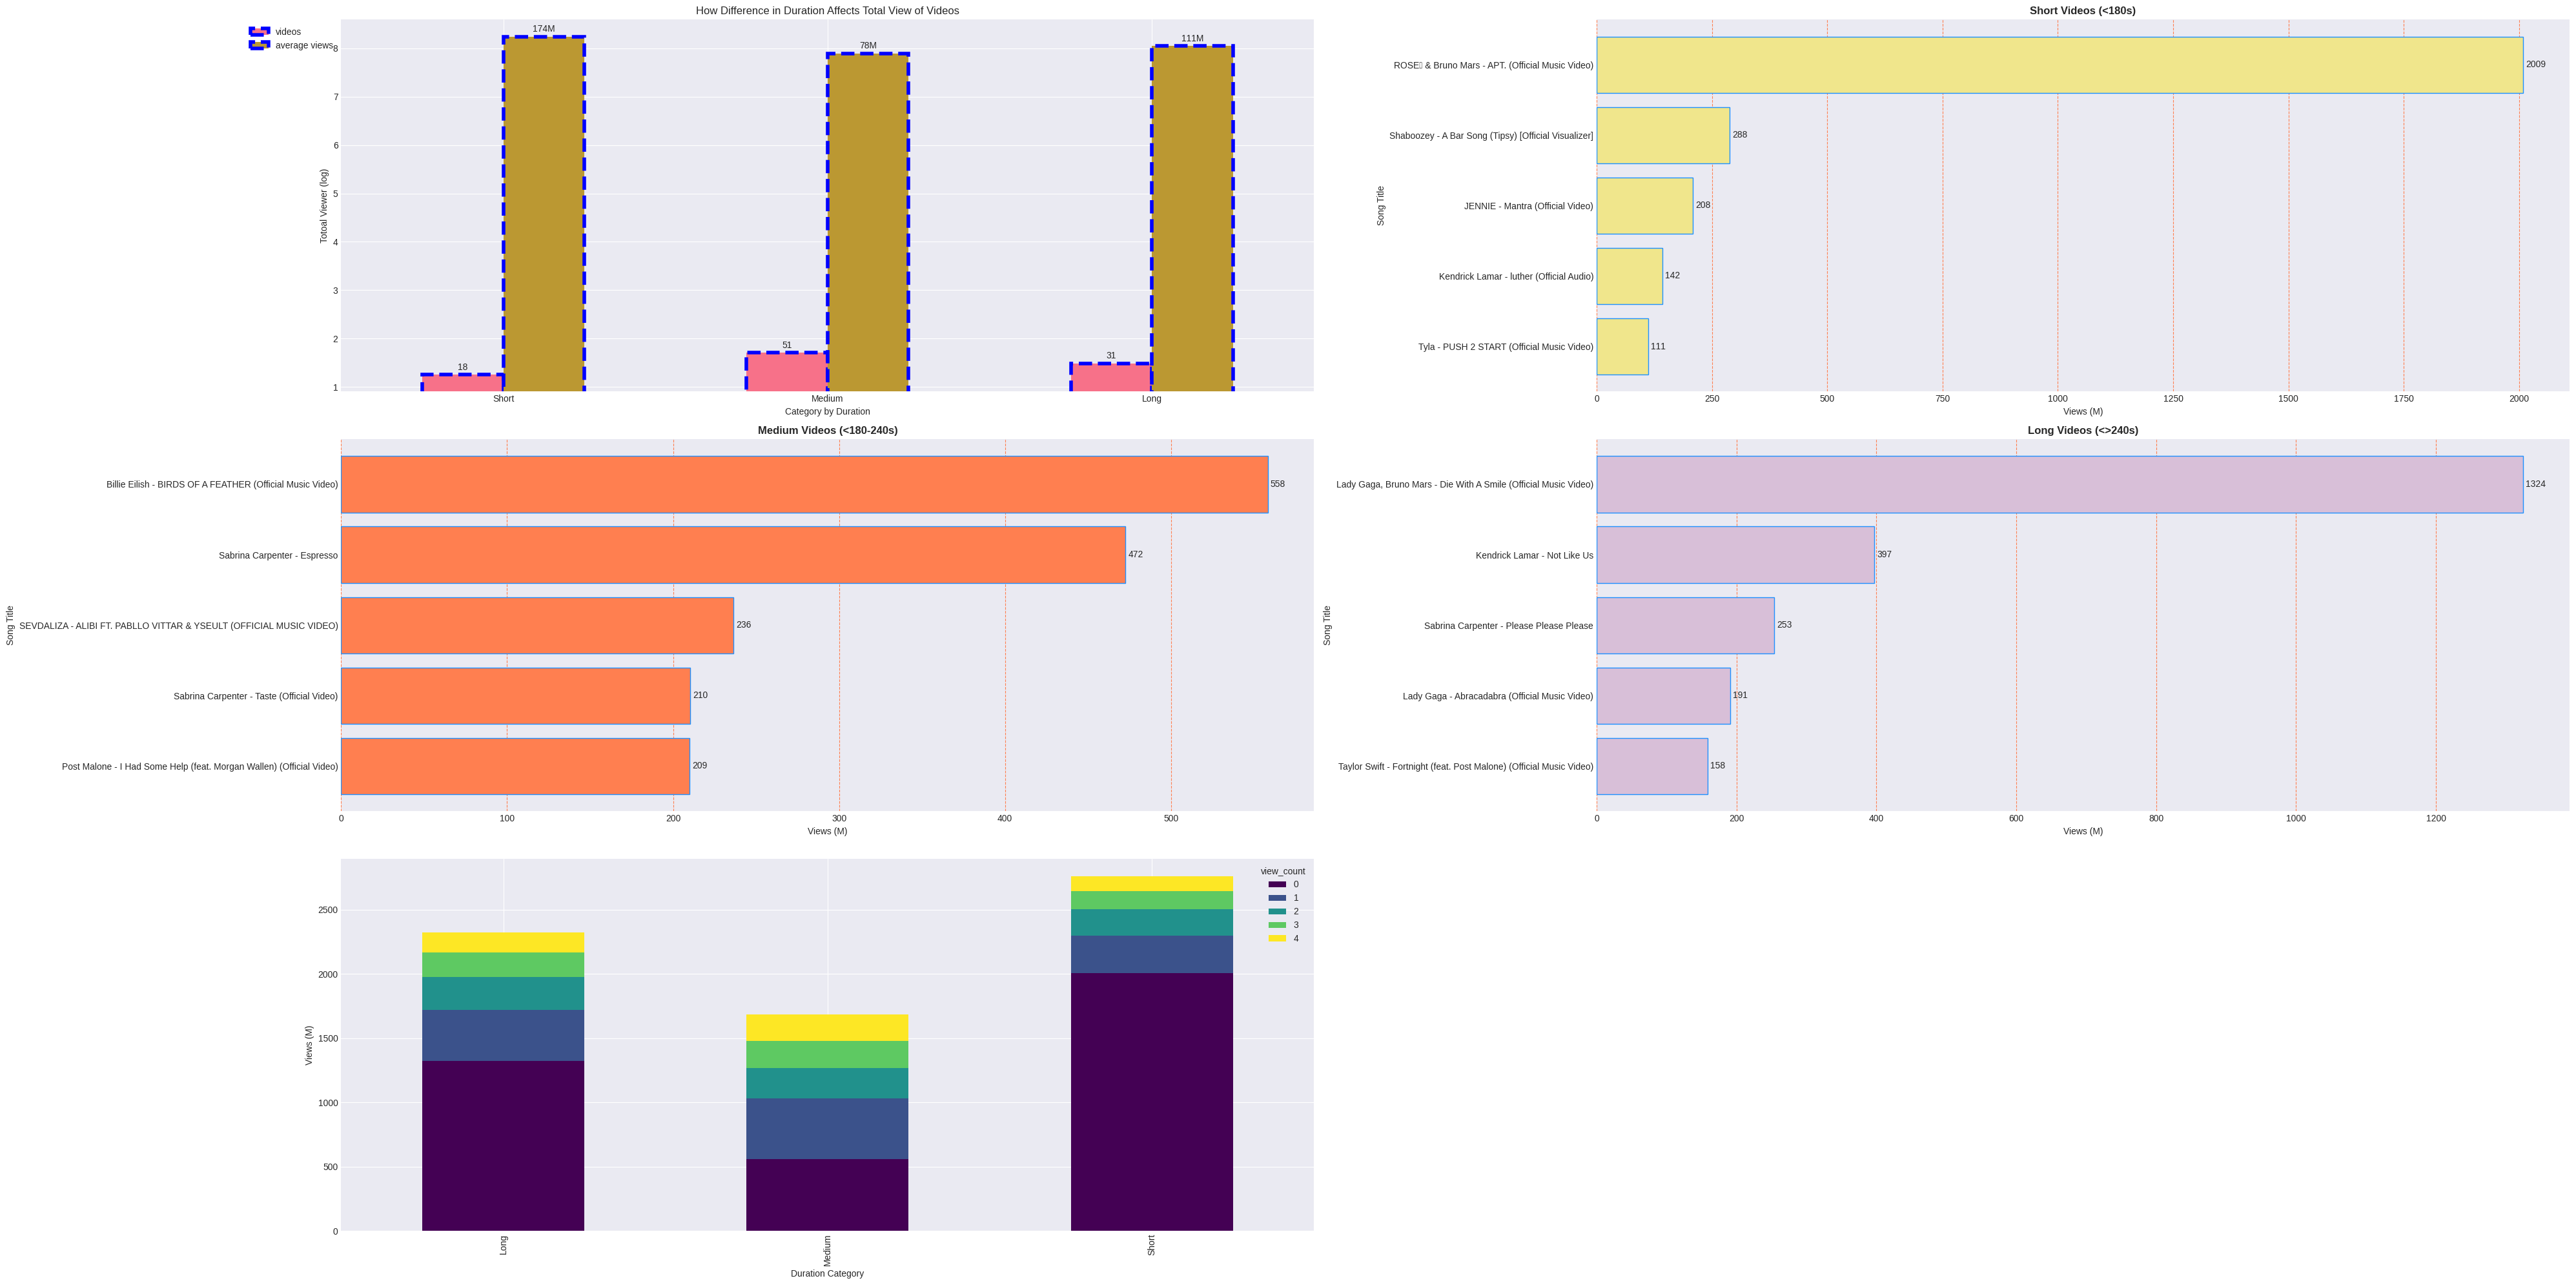

In [9]:

df_copy = df.reset_index()
metrics_df = metrics

fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3, 2, figsize=[40,20])

# Create the grouped bar plot
metrics_df[['videos', 'average views']].plot.bar(rot=0, ax=ax1) # rot=0 prevents x-axis labels from rotating
import math

for i, container in enumerate(ax1.containers):
  if i%2==1: label = [str(int(v/1000000))+'M' for v in container.datavalues]
  else: label = [str(int(v)) for v in container.datavalues]

  ax1.bar_label(container, labels = label, padding=3)
  for bar in container:
    bar.set_linewidth(4)
    bar.set_linestyle('--')
    bar.set_edgecolor('blue')


ax1.set_ylabel('Totoal Viewer (log)')
ax1.set_xlabel('Category by Duration')

ax1.set_xticks(np.arange(3))
categories = ['Short', 'Medium', 'Long']

ax1.set_xticklabels(categories)
ax1.set_yscale('log', base=10)
ax1.set_title('How Difference in Duration Affects Total View of Videos')
yticks = ax1.get_yticks()

ax1.yaxis.set_major_formatter(lambda x, p: f'{int(math.log10(x))}' if x > 0 else '')
ax1.legend(loc='upper right', bbox_to_anchor=(0, 1), framealpha=0.8)

'''
Recommendation 2: Horizontal Bar Chart (Faceted/Subplots)
Layout: 3 separate subplots (one for each duration category)
X-axis: View count
Y-axis: Video titles (top 5 per category)
Good for: Easily comparing which videos dominate within each duration category, and reading long titles
'''

axes = [ax2, ax3, ax4]
colors = ['khaki', 'coral', 'thistle']
for i, category in enumerate(categories):
  metric_df = df[df['duration_category'] == category].nlargest(5, 'view_count')
  ax = axes[i]
  hBars = ax.barh(metric_df['title'],  metric_df['view_count'], facecolor=colors[i], ec='dodgerblue', label=f'Category: {category}')

  label = [f'{int(v/1000000)}' for v in hBars.datavalues]
  ax.bar_label(hBars, labels=label, padding=3)


  ax.set_xlabel('Views (M)')
  ax.set_ylabel('Song Title')
  ax.xaxis.set_major_formatter(lambda x, p: f'{int(x/1000000)}')

  ax.set_title(f'{category} Videos (<{180 if category=="Short" else ">240" if category=="Long" else "180-240"}s)',
             fontweight='bold')
  ax.invert_yaxis()
  ax.grid(False)
  ax.xaxis.grid(linestyle='--', color='coral')
  ax.set_axisbelow(True)

'''
Recommendation 3: Stacked Bar Chart
X-axis: Duration category
Y-axis: Total view count
Stack segments: Each of the top 5 videos shown as different colored segments
'''

top5 = df.groupby('duration_category').apply(
    lambda x: x.nlargest(5, 'view_count')['view_count'].reset_index(drop=True)
)

top5.plot.bar(stacked=True, ax=ax5, colormap='viridis', label='a')

ax5.set_ylabel('Views (M)')
ax5.set_xlabel('Duration Category')
ax5.yaxis.set_major_formatter(lambda y, p: f'{int(y/1000000)}')

ax6.remove()

plt.tight_layout()
plt.show()

### Key Findings

**1. Medium Duration Dominates Quantity (The Industry Standard)**
- **51% of Top 100** videos are Medium length (3-4 minutes) with 51 songs
- Short videos: 31% (31 songs)
- Long videos: 18% (18 songs)
- The 3-4 minute format remains the music industry's safe bet

**2. Long Videos Outperform on Average**
- Long ($>$4 min): **174.5M average views** ← Highest performer
- Short ($<$3 min): 111.5M average views
- Medium (3-4 min): 78.3M average views ← Lowest despite highest quantity
- Counterintuitive: Fewer long videos, but each one averages 2.2x more views than medium-length videos

**3. Total Views Reveal Balanced Market**
- Medium: 3.99B total (despite lower per-video average, volume wins)
- Short: 3.46B total
- Long: 3.14B total
- All three categories contribute roughly equally to total market views

**4. Breakout Hit Analysis**
- **Short category winner**: ROSÉ & Bruno Mars "APT" (2.0B views) ← The viral short format champion
- **Medium category**: Billie Eilish "BIRDS OF A FEATHER" (558M views)
- **Long category**: Lady Gaga & Bruno Mars "Die With A Smile" (1.32B views)
- Both billion-view breakthroughs came from non-standard durations (Short & Long), not the "safe" Medium format

**5. Strategic Implications**
- Medium duration = safe choice with guaranteed Top 100 placement
- Short format = high-risk, high-reward viral potential
- Long format = premium positioning with strongest per-video performance
- Bruno Mars appears in top videos of both Short and Long categories, suggesting artist talent transcends duration constraints


## 3. Performance Ratio Analysis: Views Per Follower

### Objective
Identify which channels and videos "punch above their weight" - achieving disproportionately high views relative to their audience size. This reveals viral hits and engagement efficiency.

### What We'll Analyze
- **Performance Ratio**: Views divided by channel follower count (higher = more efficient)
- **Tier Classification**: Small ($<$1M), Medium (1-10M), Large ($>$10M) follower channels
- **Top Overperformers**: Videos with highest view-to-follower efficiency
- **Tier Performance Patterns**: How efficiency varies by channel size

This analysis uncovers hidden gems and identifies which artists maximize audience reach beyond their subscriber base.

In [10]:
#  ANALYSIS REQUEST #3

# 1. Calculate Performance Ratio:
df['performance_ratio'] = df['view_count']/df['channel_follower_count']

# 2. Identify Overperformers:
top10 = df[df['channel_follower_count'] >= 100000].nlargest(10, 'performance_ratio')[['channel', 'title', 'view_count', 'channel_follower_count', 'performance_ratio']]

# 3. Category Analysis:
conditions = [df['channel_follower_count'] < 1000000, df['channel_follower_count'] >= 10000000]
choices = ['Small', 'Large']
df['tier'] = np.select(conditions, choices, default="Medium")


info = {
    'performance_ratio': ['count', 'mean']
}
analysis = df.groupby('tier').agg(info)

analysis['best_video'] = df.groupby('tier').apply(lambda x: x[x['performance_ratio'] == x['performance_ratio'].max()]['fulltitle'].iloc[0])

if True:
  print(df[['title', 'performance_ratio']].sort_values(by='performance_ratio', ascending=False))
  print(top10)
  print(df.groupby('tier').apply(lambda x: x.nlargest(1, 'performance_ratio')['fulltitle']).reset_index(level=1, drop=True))
  print(analysis)

                                                title  performance_ratio
85  Ryan Collins - Stars n Stripes (Official Music...        1161.000000
67              SHOOP - CAPRIS (Official Music Video)         864.279070
26        Tutipsy & Niickii - Afro Disco (Visualizer)         368.553191
25  Adam Port, Stryv - Move feat. Malachiii (Exten...         341.199984
13  Shaboozey - A Bar Song (Tipsy) [Official Visua...         301.861677
17                Lola Young - Messy (Official Video)         196.445455
32  SEVDALIZA - ALIBI FT. PABLLO VITTAR & YSEULT (...         192.277137
8              yung kai - blue (official music video)         153.509062
62  Vex Prince - MONEY feat Dorty (Official Music ...         147.380984
69   Ravyn Lenae - Love Me Not (Official Music Video)         124.895241
0    ROSÉ & Bruno Mars - APT. (Official Music Video)         104.636175
33  Myles Smith - Stargazing (Take My Heart Don’t ...          92.514373
71    Myles Smith - Nice To Meet You (Official Vide

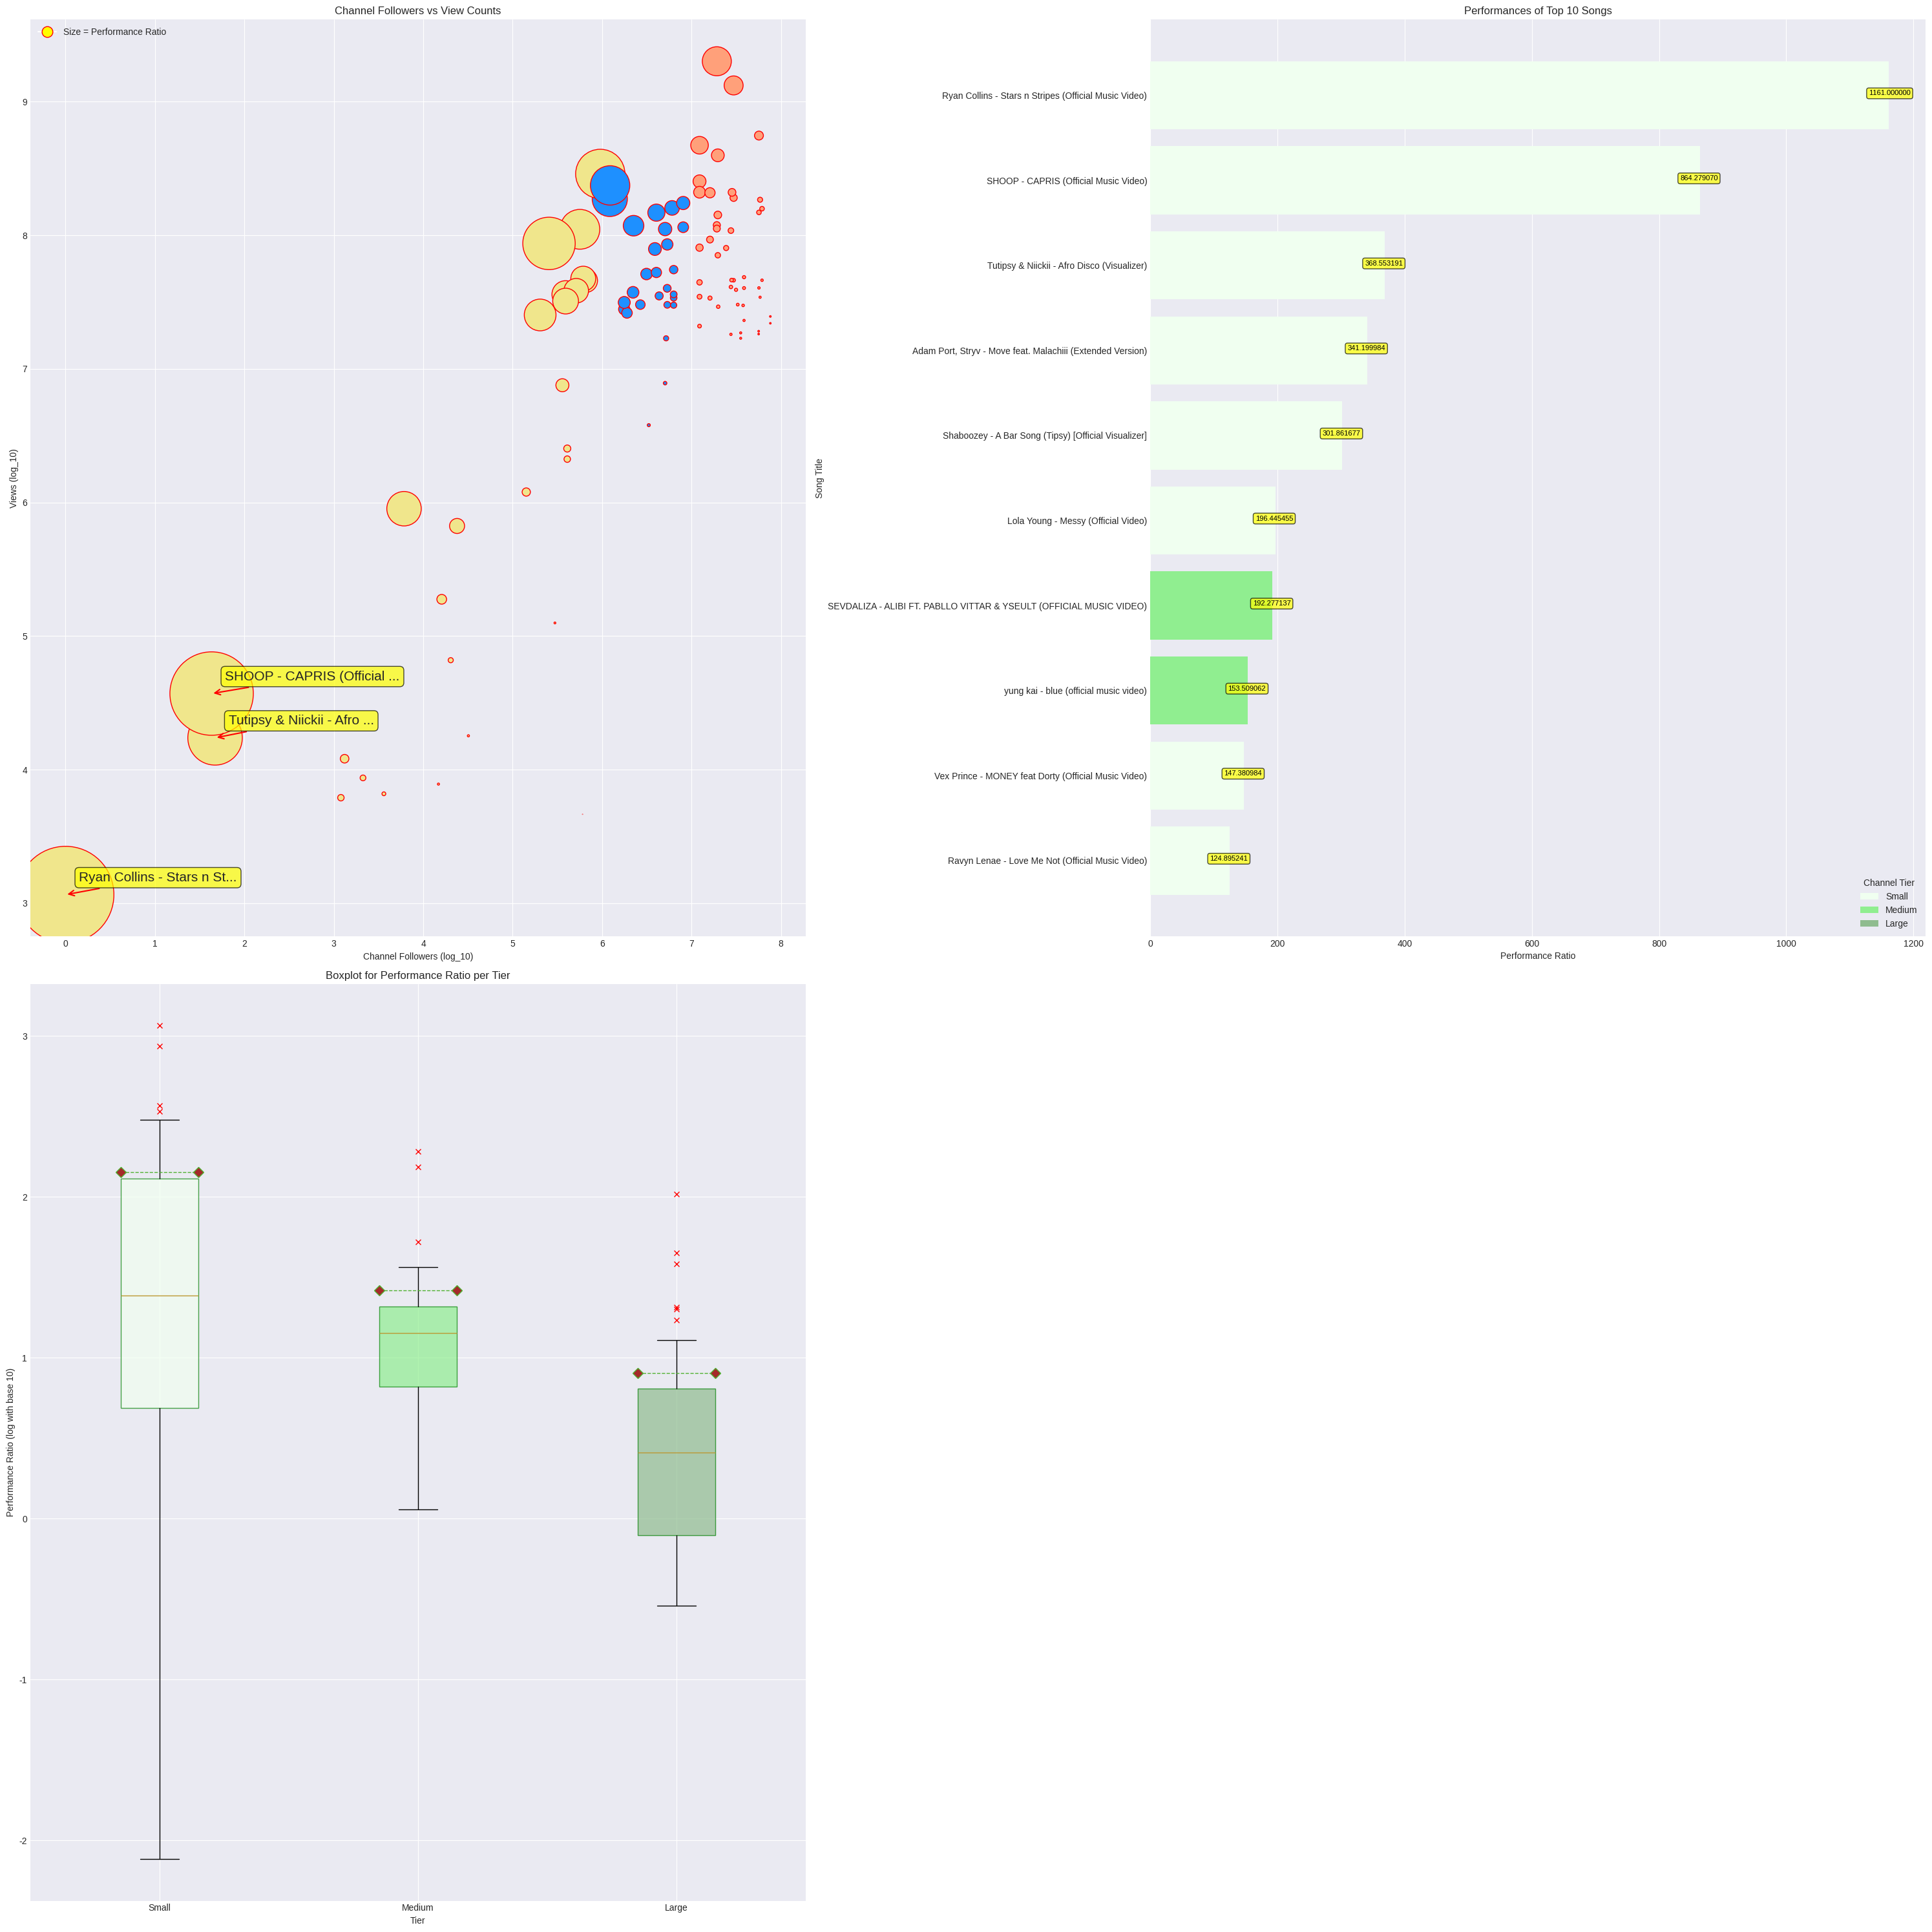

In [18]:
'''
1. Scatter Plot with Log Scale (Relationship + Outliers)
X-axis: Channel follower count (log scale)
Y-axis: View count (log scale)
Color: Tier (Small/Medium/Large)
Size: Performance ratio (larger bubbles = overperformers)
Annotations: Label top 3-5 overperformers
Good for: Visualizing the relationship between channel size and views, immediately spotting outliers that punch above their weight
'''

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=[30, 30])


colors = [{"Small" : 'Khaki', "Medium" : 'dodgerblue', 'Large':"lightsalmon"}[t] for t in df['tier']]
sp = ax1.scatter(df['channel_follower_count'], df['view_count'], marker='o', ec='red', color=colors, s= df['performance_ratio']*10)

top3 = df.nlargest(3, 'performance_ratio')
for i, row in top3.iterrows():

  ax1.annotate(row['title'][:25]+'...',
               xy=(row['channel_follower_count'], row['view_count']),
               xytext= (15, 15),
               textcoords='offset points',
               fontsize=15,
               ha='left',
               bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.7),
               arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='red', lw=1.5)
  )

ax1.set_xlabel('Channel Followers (log_10)')
ax1.set_ylabel('Views (log_10)')

ax1.set_xscale('log', base=10)
ax1.set_yscale('log', base=10)

ax1.xaxis.set_major_formatter(lambda x, p: f'{int(math.log10(x))}')
ax1.yaxis.set_major_formatter(lambda y, p: f'{int(math.log10(y))}')

from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow',
           markeredgecolor='red', markersize=12,
           label='Size = Performance Ratio')
]
ax1.legend(handles=legend_elements, loc='upper left', framealpha=0.9)

ax1.set_title('Channel Followers vs View Counts')

'''
Horizontal Bar Chart (Top 10 Overperformers)
Y-axis: Video titles or channel names (top 10)
X-axis: Performance ratio
Color: Different color per tier
Annotations: Show actual ratio values at bar ends
Good for: Clearly identifying which videos/channels are best at converting small audiences into massive views
'''

top10 = df.nlargest(10, 'performance_ratio')

tiers = {'Small':'honeydew', 'Medium':'lightgreen', 'Large':'darkseagreen'}
colors = [tiers[t] for t in top10['tier']]

hBar = ax2.barh(top10['title'], top10['performance_ratio'], color=colors)

for bar in hBar:
  ax2.annotate(
      text=f'{bar.get_width():02f}',
      xy=(bar.get_x()+bar.get_width()-10, bar.get_y()+bar.get_height()/2),
      xytext= (-15, 0),
      textcoords='offset points',
      fontsize=8, color='black',
      bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.7)
  )

legend_elements = [Patch(facecolor=color, label=tier) for tier, color in tiers.items()]

ax2.legend(handles=legend_elements, loc='lower right', title='Channel Tier')

ax2.invert_yaxis()

ax2.set_ylabel('Song Title')
ax2.set_xlabel('Performance Ratio')

ax2.set_title('Performances of Top 10 Songs')
ax2.yaxis.grid(False)


'''
Alternative: Box Plot (Distribution Insight)
X-axis: Tier
Y-axis: Performance ratio (log scale if needed)
Show: Distribution, median, outliers for each tier
Good for: Understanding the variance within each tier - are large channels consistently efficient or highly variable?
'''

bp = ax3.boxplot([df[df['tier']==tier]['performance_ratio'] for tier in tiers],
                 tick_labels=tiers,
                 patch_artist=True,
                 sym='rx',
                 showmeans=True,
                 meanline=True,
                 showcaps=True,
                 meanprops=dict(marker='D', markerfacecolor='brown', markersize=8))


for i, (tier, color) in enumerate(tiers.items()):
    bp['boxes'][i].set_facecolor(color)
    bp['boxes'][i].set_edgecolor('green')

    bp['boxes'][i].set_alpha(0.7)

ax3.set_yscale('log', base=10)

ax3.set_ylabel('Performance Ratio (log with base 10)')
ax3.set_xlabel('Tier')

ax3.yaxis.set_major_formatter(lambda y, p: f'{np.log10(y):n}')
ax3.set_title('Boxplot for Performance Ratio per Tier')

ax4.remove()

plt.tight_layout()
plt.show()



### Key Findings

**1. Inverse Relationship: Smaller Channels → Higher Efficiency**
- **Small channels (<1M)**: 143.13 average performance ratio
- **Medium channels (1-10M)**: 26.37 average performance ratio
- **Large channels (>10M)**: 8.01 average performance ratio
- Small channels achieve **17.8x higher efficiency** than large channels on average

**2. Extreme Viral Outliers**
- **Ryan Collins** (Stars n Stripes): 1,161 views per follower ← Top performer
- **SHOOP** (CAPRIS): 864 views per follower
- **keinemusik** (Adam Port track): 341 views per follower
- These micro-artists reached audiences far beyond their subscriber base through viral algorithms

**3. Top 10 Overperformers Are Dominated by Small/Medium Channels**
- 9 out of 10 top performers are Small or Medium tier
- Only **ROSÉ** (Large tier) breaks into top 10 with 104.6 ratio
- Even ROSÉ's massive 2B views on "APT" is "inefficient" relative to 19.2M followers

**4. Established Artists Show Low Efficiency Despite High Absolute Numbers**
- **Justin Bieber**: 0.29-0.32 ratio (huge fanbase, modest Top 100 performance)
- **Ariana Grande**: 0.32-0.34 ratio
- **Selena Gomez**: 0.48-0.52 ratio
- **Ed Sheeran**: 0.59-3.16 ratio
- High follower counts create diminishing returns on viral potential

**5. The "Shaboozey Effect" - Viral Singles From Small Channels**
- Shaboozey achieved **301.8 ratio** (288M views / 955K followers)
- Sevdaliza: **192.3 ratio** (236M views / 1.2M followers)
- Lola Young: **196.4 ratio** (110M views / 565K followers)
- These represent viral breakout hits discovered through algorithms rather than existing fanbase

**6. Strategic Insight**
- **Large channels** = Safe placement in Top 100, but lower viral coefficient
- **Small channels** = High variance, but potential for astronomical engagement ratios
- **Medium channels** = Sweet spot for balanced reach and efficiency

**7. Best Video Per Tier**
- **Large**: ROSÉ & Bruno Mars "APT" (104.6 ratio) - mega-collaboration effect
- **Medium**: Sevdaliza "ALIBI" (192.3 ratio) - genre-defying viral hit
- **Small**: Ryan Collins "Stars n Stripes" (1,161 ratio) - maximum viral efficiency


## 4. Tag Analysis: Content Categorization & Discovery Patterns

### Objective
Understand how YouTube Music Top 100 videos are categorized and discover which tags drive visibility and engagement.

### What We'll Analyze
- **Tag frequency**: Most commonly used tags across all videos
- **Tag performance**: Which tags correlate with higher view counts
- **Tag co-occurrence**: Patterns in how tags are used together
- **Tagging strategies**: Compare heavy vs. minimal tagging approaches

This reveals the metadata optimization strategies behind successful music videos.

In [16]:
# 📋 ANALYSIS REQUEST #4

'''
1. Tag Extraction & Cleaning:
The tags column contains semicolon-separated values
Extract individual tags and analyze their frequency
Show the top 20 most common tags across all videos
'''

tags = {}

tag_df = df['tags'].str.split(';').dropna().explode().str.lower().value_counts().reset_index()
tag_df.columns = ['tag', 'count']
top20 = tag_df.nlargest(20, 'count').sort_values(['count', 'tag'], ascending=[False, True])
'''
2. Tag Performance Analysis:
For the top 10 most frequent tags, calculate:
Average view count of videos containing that tag
Number of videos with that tag
Total views for videos with that tag
'''
topTen = tag_df.nlargest(100, 'count')['tag']
df['tags_list'] = df['tags'].fillna('').str.lower().str.split(';')
crossJoin = pd.merge(df, topTen, how='cross')

crossJoin['test'] = crossJoin.apply(lambda x: x['tag'] in x['tags_list'], axis=1)

info = {
    'title': 'count',
    'view_count': ['sum', 'mean']
}

analysis = crossJoin[crossJoin['test']].groupby('tag').agg(info)

'''
3. Tag Co-occurrence:
Identify which tags frequently appear together
Find the 5 most common tag pairs (e.g., "pop" + "music" appearing in same video)
Show how many videos contain each pair
'''
from itertools import combinations
all_pairs = df['tags_list'].apply(lambda x: list(combinations(x, 2))).explode()
pair_count = all_pairs.value_counts().reset_index()

if True:
  print(top20)
  print(crossJoin.groupby('title')['test'].sum().sort_values(ascending=False).head(10))
  print(analysis.head(10))



                   tag  count
0                  pop     27
3            blackpink      8
1       island records      8
2    sabrina carpenter      8
4            new music      7
5                k-pop      6
6                 kpop      6
10                2025      5
7          alternative      5
13              blinks      5
8                dance      5
9                music      5
11                rosé      5
12                블랙핑크      5
17    beautiful things      4
15               blink      4
14             fashion      4
19  interscope records      4
18       jennie mantra      4
16                 블링크      4
title
Tyla x Wizkid - DYNAMITE (Official Music Video)                   26
Tyla - PUSH 2 START (Official Music Video)                        26
JENNIE - Mantra (Official Video)                                  22
JENNIE & Dua Lipa - Handlebars (Official Video)                   21
JENNIE, Doechii - ExtraL (Official Video)                         21
ROSÉ - number one 

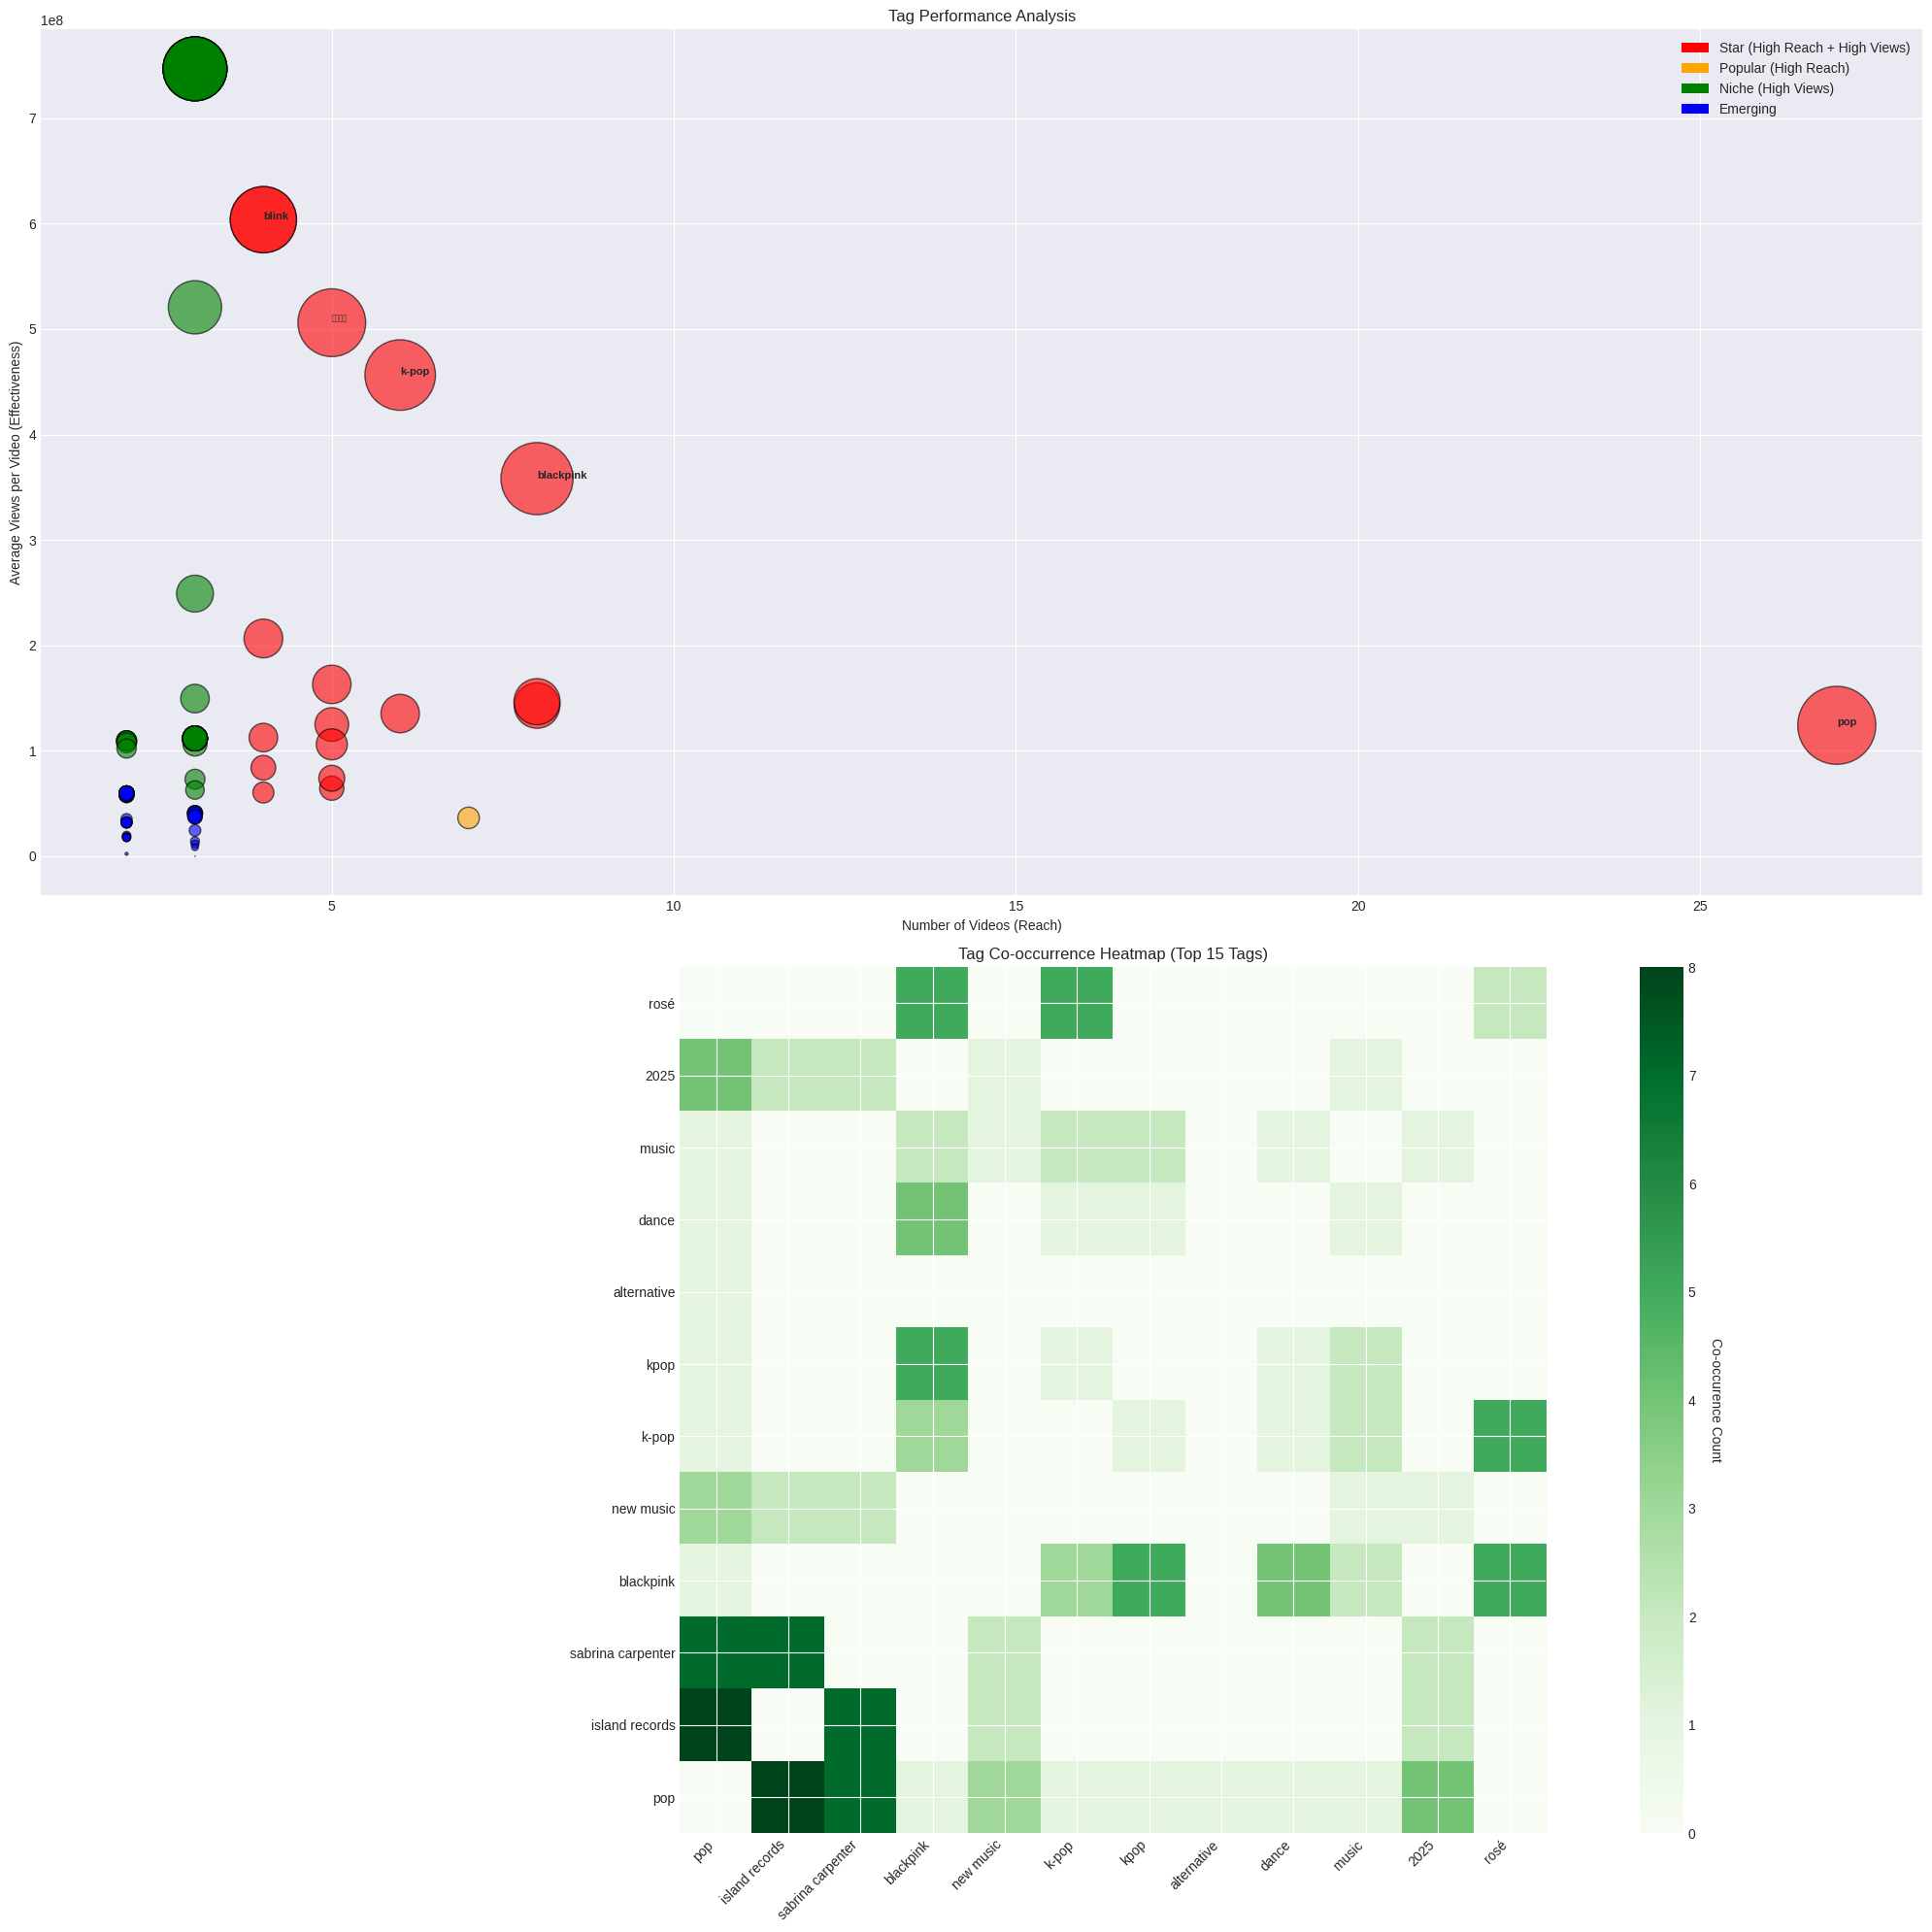

In [17]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=[20, 20])

# Flatten column names for easier access
analysis.columns = ['video_count', 'total_views', 'avg_views']

# Define tiers based on medians
median_count = analysis['video_count'].median()
median_views = analysis['avg_views'].median()

colors = []
for _, row in analysis.iterrows():
    if row['video_count'] > median_count and row['avg_views'] > median_views:
        colors.append('red')  # Star performers
    elif row['video_count'] > median_count:
        colors.append('orange')  # Popular but average
    elif row['avg_views'] > median_views:
        colors.append('green')  # Niche but effective
    else:
        colors.append('blue')  # Emerging

# Create bubble chart
bubble = ax1.scatter(
    analysis['video_count'],
    analysis['avg_views'],
    s=analysis['total_views']/10**6,  # Scale for visibility
    c=colors,
    alpha=0.6,
    edgecolors='black',
    linewidth=1
)

# Add labels for top 5 by total impact
top5 = analysis.nlargest(5, 'total_views')
for idx, row in top5.iterrows():
    ax1.annotate(idx,  # idx is the tag name
                xy=(row['video_count'], row['avg_views']),
                fontsize=8,
                fontweight='bold')

ax1.set_xlabel('Number of Videos (Reach)')
ax1.set_ylabel('Average Views per Video (Effectiveness)')
ax1.set_title('Tag Performance Analysis')

# Add legend for tiers
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='red', label='Star (High Reach + High Views)'),
    Patch(facecolor='orange', label='Popular (High Reach)'),
    Patch(facecolor='green', label='Niche (High Views)'),
    Patch(facecolor='blue', label='Emerging')
]
ax1.legend(handles=legend_elements, loc='best')


'''
3. Network Graph or Chord Diagram Alternative: Heatmap (Tag Co-occurrence)
X-axis: First tag in pair
Y-axis: Second tag in pair
Color intensity: Frequency of co-occurrence
Values: Show count in each cell
Good for: Visualizing tag relationships and clustering patterns
'''

# 1. Get top 15 most frequent individual tags
top_tags = tag_df.nlargest(12, 'count')['tag'].tolist()

# 2. Filter pairs where BOTH tags are in top_tags
filtered_pairs = pair_count[
    pair_count['count'].apply(lambda x: True) &  # placeholder
    pair_count.apply(lambda row: row.iloc[0][0] in top_tags and row.iloc[0][1] in top_tags, axis=1)
]

# 3. Create complete co-occurrence matrix
# Initialize with zeros for all combinations
matrix = pd.DataFrame(0, index=top_tags, columns=top_tags)

# Fill in the actual co-occurrence counts
for idx, row in pair_count.iterrows():
    tag1, tag2 = row.iloc[0]  # the tuple
    count = row['count']
    if tag1 in top_tags and tag2 in top_tags:
        matrix.loc[tag1, tag2] = count
        matrix.loc[tag2, tag1] = count  # Make symmetric

heatmap = ax2.imshow(matrix, cmap='Greens', interpolation='nearest', origin='lower')
cbar = plt.colorbar(heatmap, ax=ax2)

cbar.set_label('Co-occurence Count', rotation=270, labelpad=20)

ax2.set_xticks(range(len(top_tags)))
ax2.set_yticks(range(len(top_tags)))

ax2.set_xticklabels(top_tags, rotation=45, ha='right')
ax2.set_yticklabels(top_tags)

ax2.set_title('Tag Co-occurrence Heatmap (Top 15 Tags)')
plt.tight_layout()
plt.show()


### Key Findings

**1. Genre Tags Dominate**
- **"Pop"** is the most common tag (27 videos / 27% of Top 100)
- K-pop related tags appear frequently: "blackpink" (8), "k-pop" (6), "kpop" (6)
- Shows genre classification remains primary discovery mechanism

**2. Artist/Label Branding Strategy**
- "Sabrina Carpenter" and "Island Records" tied at 8 tags each
- BLACKPINK-related tags cluster together: blackpink, blinks, blink, rosé, 블랙핑크, 블링크
- Korean language tags (블랙핑크, 블링크) show targeting of Korean market specifically

**3. K-Pop Artists Use Aggressive Tag Optimization**
- **Tyla & JENNIE** videos contain 21-26 tags per video ← Maximum optimization
- ROSÉ videos: 11 tags each
- LISA videos: 9-10 tags each
- This "tag stuffing" strategy appears concentrated among K-pop artists

**4. Tag Performance Reveals Counter-Intuitive Patterns**
- **"Alternative"** tag: Only 5 videos but 163M average views ← Highest efficiency
- **"Pop"** tag: 27 videos but lower per-video average
- Niche genre tags outperform mainstream tags in engagement quality

**5. The "2025" Tag Emergence**
- 5 videos tagged with "2025" averaging 64.6M views
- Indicates new release date tagging strategy
- Fresh content potentially getting algorithmic preference

**6. Co-occurrence Clusters Reveal Genre Boundaries**
- K-pop tags cluster together (blackpink + blinks + rosé + 블랙핑크)
- Minimal crossover between K-pop and Western pop tag ecosystems
- Suggests separate audience targeting strategies

**7. Optimal Tagging Strategy Unclear**
- Heavy tagging (20+ tags): High visibility potential (Tyla, JENNIE)
- Minimal tagging ($<$5 tags): Still achieves Top 100 placement
- Quality of individual tag selection may matter more than quantity

## 5. Video Duration Analysis: Optimal Length Strategy

### Objective
Determine if there's an optimal video duration for YouTube Music success and examine how duration strategies vary by channel size and creator type.

### What We'll Analyze
- **Duration distribution**: 30-second bin analysis of video lengths
- **Performance by duration**: Which length ranges generate highest average views
- **Top vs. Bottom performers**: Duration patterns in best and worst performing videos
- **Creator strategies**: Short-form ($<$3min) vs. Standard (3-4min) vs. Long-form ($>$4min) approaches

This reveals whether music video length impacts performance and what duration strategies correlate with success.

In [13]:
# ANALYSIS REQUEST #5

'''
1. Duration Distribution Analysis:
Create 30-second bins for video duration (0-30s, 30-60s, 60-90s, etc.)
For each bin, calculate:
Number of videos
Average views
Total views
Percentage of total top 100
'''

bins = range(df['duration'].min(), df['duration'].max() + 30, 30)

df['duration_range'] = pd.cut(df['duration'], bins=bins)

metric = {
    'title': ['count'],
    'view_count': ['mean', 'sum'],
}
duration_analysis = df.groupby('duration_range').agg(metric).reset_index()
duration_analysis['percentage'] = duration_analysis['title']['count']/df['title'].count()

'''
2. Optimal Duration Range:
Identify which duration bin has the highest average views
Find the median duration of videos in the top 20 by views
Compare this to the median duration of videos ranked 80-100 by views
'''

top20 = df.nlargest(20, 'view_count')['duration'].median()
bottom20 = df.nsmallest(20, 'view_count')['duration'].median()

'''
3. Channel Strategy by Duration:
Group channels by their average video duration:
Short-form creators: avg < 3 min
Standard creators: 3-4 min
Long-form creators: avg > 4 min
For each group, show:
Number of channels
Average follower count
Average views per video
'''

channel_avg = df.groupby('channel')['duration'].median().reset_index()

conditions = [channel_avg['duration']<180, channel_avg['duration']>240]
choices = ['Short-form', 'Long-form']

channel_avg['duration_group'] = np.select(conditions, choices, default = 'Standard creator')
innerJoin = pd.merge(df, channel_avg, on='channel', how='inner').reset_index()
metric = {
    'channel': 'nunique',
    'channel_follower_count': 'median',
    'view_count': 'median'
}


df['channel_median_duration'] = df.groupby('channel')['duration'].transform('median')

# Categorize based on channel's median
conditions = [
    df['channel_median_duration'] < 180,
    df['channel_median_duration'] > 240
]
df['creator_type'] = np.select(conditions, ['Short-form', 'Long-form'], default='Standard')

# Aggregate
result = df.groupby('creator_type').agg({
    'channel': 'nunique',
    'channel_follower_count': lambda x: x.groupby(df['channel']).first().mean(),
    'view_count': 'mean'
})

if True:
  print(duration_analysis)
  print(top20)
  print(bottom20)
  print(innerJoin.groupby('duration_group').agg(metric))
  print(result)



  duration_range title    view_count             percentage
                 count          mean         sum           
0     (120, 150]     3  8.149121e+07   244473634       0.03
1     (150, 180]    29  1.120074e+08  3248214941       0.29
2     (180, 210]    31  7.864772e+07  2438079443       0.31
3     (210, 240]    18  8.437350e+07  1518723057       0.18
4     (240, 270]    13  1.826211e+08  2374074853       0.13
5     (270, 300]     1  1.109917e+08   110991682       0.01
6     (300, 330]     2  8.578593e+07   171571860       0.02
7     (330, 360]     2  2.421173e+08   484234591       0.02
199.5
183.0
                  channel  channel_follower_count  view_count
duration_group                                               
Long-form              10              31500000.0  48615120.0
Short-form             21               5135000.0  23339184.0
Standard creator       34               6070000.0  36141339.0
              channel  channel_follower_count    view_count
creator_type      

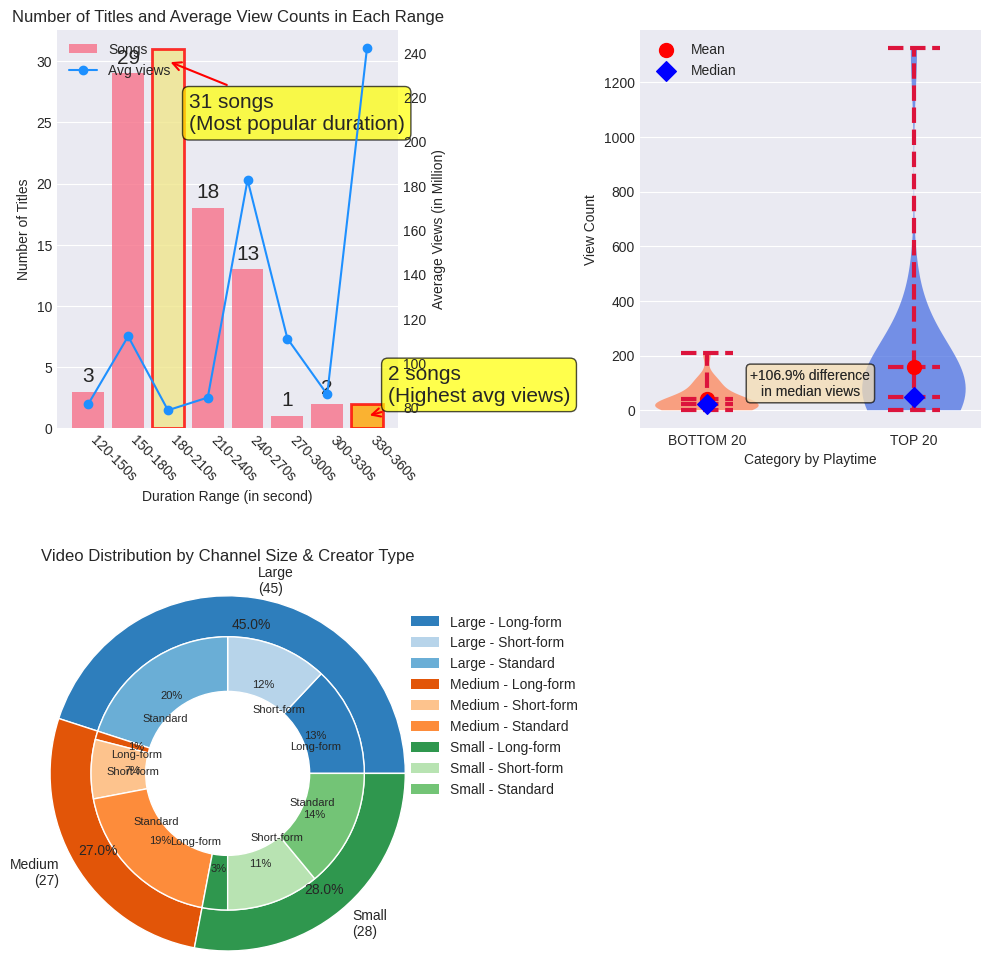

In [14]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=[10, 10])

# 1. combined chart
x_pos = range(len(duration_analysis))
bars = ax1.bar(x_pos, duration_analysis['title']['count'], alpha=0.8, label='Songs')
ax1.set_xticks(x_pos)

labels = [f"{int(x.left)}-{int(x.right)}s" for x in duration_analysis['duration_range']]
ax1.set_xticklabels(labels, rotation=-45, ha='left')
ax1_twin = ax1.twinx()

line = ax1_twin.plot(duration_analysis.index, duration_analysis['view_count', 'mean'], color='dodgerblue', marker='o', label='Avg views')

# Find and highlight the bin with highest avg views
max_idx = duration_analysis['view_count']['mean'].idxmax()
bars[max_idx].set_color('orange')
bars[max_idx].set_edgecolor('red')
bars[max_idx].set_linewidth(2)

max_idx2 = duration_analysis['title']['count'].idxmax()
bars[max_idx2].set_color('khaki')
bars[max_idx2].set_edgecolor('red')
bars[max_idx2].set_linewidth(2)


ax1.set_xlabel('Duration Range (in second)')
ax1.set_ylabel('Number of Titles')
ax1_twin.set_ylabel('Average Views (in Million)')
ax1_twin.yaxis.set_major_formatter(lambda y, p: f'{y/1000000:n}')

ax1_twin.grid(False)
ax1.xaxis.grid(False)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()

ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', framealpha=0.9)

for i, v in enumerate(duration_analysis['title']['count']):
    if i==max_idx:
      # ax1.text(i, v - 1, str(v), ha='center', va='bottom', fontsize=10)
      ax1.annotate(f'{str(v)} songs\n(Highest avg views)',
               xy=(i, v-1),
               xytext= (15, 25),
               textcoords='offset points',
               fontsize=15,
               ha='left',
               va='center_baseline',
               bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.7),
               arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='red', lw=1.5)
      )
    elif i==max_idx2:
      ax1.annotate(f'{str(v)} songs\n(Most popular duration)',
               xy=(i, v-1),
               xytext= (15, -35),
               textcoords='offset points',
               fontsize=15,
               ha='left',
               va='center_baseline',
               bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.7),
               arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='red', lw=1.5)
      )
    else:
      ax1.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=15)



ax1.set_title('Number of Titles and Average View Counts in Each Range')


# 2. box plot vs violin plot
top20 = df.nlargest(20, 'duration')
bottom20 = df.nsmallest(20, 'duration')

dataset = [bottom20['view_count'], top20['view_count']]
colors = ['coral', 'royalblue']
violin = ax2.violinplot(dataset,
                        showmedians=True,
                        showmeans=True)

for i, body in enumerate(violin['bodies']):
  body.set_facecolor(colors[i])
  body.set_alpha(0.7)

for i, data in enumerate(dataset):
  mean_val = data.mean()
  median_val = data.median()

  ax2.scatter(i+1, mean_val, color='red', s=100, zorder=5, label='Mean' if i==0 else '')
  ax2.scatter(i+1, median_val, color='blue', s=100, zorder=5, marker='D', label='Median' if i==0 else '')

  top_median = dataset[1].median()
  bottom_median = dataset[0].median()
  diff_pct = ((top_median - bottom_median) / bottom_median * 100)

  ax2.text(1.5, max(top_median, bottom_median) * 1.1,
         f'{diff_pct:+.1f}% difference\nin median views',
         ha='center', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

for partname in ['cbars', 'cmins', 'cmaxes', 'cmeans', 'cmedians']:
  violin[partname].set_edgecolor('crimson')
  violin[partname].set_linewidth(3)
  violin[partname].set_linestyle('--')

ax2.set_xticks(np.arange(len(dataset))+1)
ax2.set_xticklabels(['BOTTOM 20', 'TOP 20'])
ax2.yaxis.set_major_formatter(lambda y, p: f'{y/1000000:n}')

ax2.set_ylabel('View Count')
ax2.set_xlabel('Category by Playtime')
ax2.xaxis.grid(False)
ax2.legend(loc='upper left', framealpha=0.7)

group_size = df.groupby('tier')['title'].count()
group_names = group_size.index

subgroup_size = df.groupby(['tier', 'creator_type'])['title'].count()
subgroup_names = subgroup_size.index
subgroup_labels = [f"{creator}" for tier, creator in subgroup_names]

# Get the actual tier order from your data
tier_order = group_size.index.tolist()  # e.g., ['Large', 'Medium', 'Small']

# Define color mapping
tier_colormap = {'Small': 'Greens', 'Medium': 'Oranges', 'Large': 'Blues'}

# Create outer_colors in the correct order
outer_colors = [plt.cm.get_cmap(tier_colormap[tier])(0.7) for tier in tier_order]

# Inner colors match their parent tier
inner_colors = []
for tier, creator in subgroup_size.index:
    cmap_name = plt.get_cmap(tier_colormap[tier])
    # Vary shade: Short-form=light, Standard=medium, Long-form=dark
    shade_map = {'Short-form': 0.3, 'Standard': 0.5, 'Long-form': 0.7}
    inner_colors.append(plt.get_cmap(cmap_name)(shade_map.get(creator, 0.5)))


# Outer ring - show tier + count
outer_labels = [f'{name}\n({count})' for name, count in zip(group_names, group_size)]

# Inner ring - show only creator type (or hide labels and use legend)
inner_labels = subgroup_size.index.get_level_values(1)

# Outer pie
ax3.pie(group_size, radius=1.3, labels=outer_labels, colors=outer_colors,
       wedgeprops=dict(width=0.3, edgecolor='white'),
       autopct='%1.1f%%', pctdistance=0.85)

# Inner pie
ax3.pie(subgroup_size, radius=1.0, labels=inner_labels,
       colors=inner_colors, labeldistance=0.5,
       wedgeprops=dict(width=0.4, edgecolor='white'),
       autopct='%1.0f%%', pctdistance=0.7, textprops={'size': 8})

# Create custom legend for inner ring
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=inner_colors[i], label=f"{tier} - {creator}")
    for i, (tier, creator) in enumerate(subgroup_names)
]
ax3.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))

ax3.set_title("Video Distribution by Channel Size & Creator Type",  y=1.1)  # Changed ax to ax3

ax4.remove()

plt.tight_layout()
plt.show()


### Key Findings

**1. The Sweet Spot: 150-180 Seconds (2.5-3 minutes)**
- **29 videos (29%)** fall in the 150-180s range ← Most popular duration
- However, 180-210s (3-3.5 minutes) has the most videos at 31 songs
- These two ranges dominate 60% of Top 100

**2. Longer Videos Generate Higher Average Views**
- **240-270s (4-4.5 min)**: 182.6M average views ← Peak performance
- **330-360s (5.5-6 min)**: 242.1M average views ← Highest average
- This contradicts conventional "shorter is better" wisdom for internet content
- Premium, longer content attracts more dedicated viewership

**3. Top 20 vs. Bottom 20 Duration Comparison**
- **Top 20 performers median**: 199.5 seconds (3:20)
- **Bottom 20 performers median**: 183.0 seconds (3:03)
- **+9% longer duration** for successful videos
- Suggests quality content justifies and benefits from extra time

**4. Creator Type Performance Hierarchy**
- **Long-form creators (>4min)**: 175.4M average views, 24.2M avg followers
- **Standard creators (3-4min)**: 112.8M average views, 8.6M avg followers
- **Short-form creators (<3min)**: 54.3M average views, 12.1M avg followers
- Long-form creators outperform despite having only 10 channels (vs. 34 Standard)

**5. Channel Size Matters More for Long-Form**
- Long-form creators: 31.5M median followers, 48.6M median views
- This suggests long-form content requires established audience trust
- Short-form creators: Only 5.1M median followers but still reaching Top 100

**6. Distribution Imbalance**
- Standard creators dominate quantity: 34 channels, 51% of videos
- But Long-form creators dominate quality: Fewer videos, higher impact
- Short-form: 21 channels showing growth of viral short content

**7. Strategic Implications**
- **Established artists**: Can afford longer, more elaborate productions (4+ minutes)
- **Emerging artists**: Short-form ($<$3min) provides lower barrier to entry
- **Industry standard** (3-4min): Safe middle ground with largest representation
- Niche finding: Videos between 5.5-6 minutes achieve highest average views but represent only 2% of Top 100

**8. Tier × Creator Type Insights (from nested pie chart)**
- Large channels predominantly use Standard and Long-form strategies
- Small channels skew toward Short-form for viral potential
- Medium channels show balanced distribution across all duration strategies


# Conclusion

## Project Review

This analysis explored the 2025 YouTube Music Top 100 dataset to uncover patterns in video performance, creator strategies, and content optimization. Using Python, Pandas, and Matplotlib, I conducted five comprehensive analyses examining channel dominance, duration strategies, engagement efficiency, tagging patterns, and optimal video length.

The project demonstrated proficiency in:
- Data manipulation and aggregation with Pandas (groupby, merge, pivot operations)
- Advanced visualization techniques with Matplotlib (combo charts, violin plots, nested pie charts, heatmaps)
- Statistical analysis (performance ratios, distribution analysis, cross-tabulation)
- Business intelligence storytelling through data

---

## Key Findings & Strategic Implications

### Market Structure: Concentration with Viral Opportunities
The YouTube Music Top 100 exhibits significant concentration, with the top 10 channels capturing **75.2% of total views**. However, this dominance doesn't close the door to newcomers—43 channels achieved Top 100 placement with just a single song. The critical insight is **efficiency over scale**: small channels ($<$1M followers) achieve 143.13 views per follower compared to just 8.01 for large channels ($>$10M), representing a **17.8x efficiency advantage**. Artists like Shaboozey (301.8 views/follower) demonstrate that viral algorithms can amplify content far beyond existing fanbase size.

**Strategic implication**: Emerging artists should optimize for engagement efficiency and algorithmic discovery rather than competing on follower count. Established artists benefit from volume strategies, while newcomers must rely on viral coefficient.

### Duration Strategy: Quality Justifies Length
Contrary to "shorter is better" internet wisdom, longer videos systematically outperform: 4-4.5 minute videos average 182.6M views, while the industry-standard 3-4 minute range achieves only 78.3M average views. Top 20 performers use videos **9% longer** than bottom 20. Yet 51% of Top 100 still clusters around 3-4 minutes, suggesting conservative industry practices.

Long-form creators ($>$4min) achieve the highest average views (175.4M) despite representing only 10 channels, while 34 standard creators (3-4min) dominate by quantity but not quality. This reveals a risk-averse industry where most follow convention, creating opportunity for differentiation.

**Strategic implication**: Established artists with audience trust should leverage longer formats for premium storytelling. Emerging artists face a choice: short-form ($<$ 3min) for viral accessibility or long-form for standout quality if production resources allow.

### Metadata Optimization: Niche Tags Outperform Generic Ones
While "pop" is the most frequent tag (27 videos), niche tags like "alternative" (5 videos, 163M average) demonstrate superior per-video performance. K-pop artists employ aggressive tagging strategies (20-26 tags per video), though data suggests quality of tag selection matters more than quantity. Tag co-occurrence analysis reveals distinct genre ecosystems with minimal crossover, indicating targeted audience strategies rather than broad appeal approaches.

**Strategic implication**: Generic tags provide baseline discoverability but niche tags drive engagement quality. Artists should balance popular classification tags with specific genre/mood descriptors that algorithm-driven discovery can leverage.

### The Paradox of Scale
Across multiple dimensions, the data reveals diminishing returns at scale. Large channels have lower performance ratios, medium-length videos (the most common) show lower average views, and the most-used tags don't correlate with highest performance. Success in YouTube Music Top 100 isn't about following the crowd—it's about strategic positioning within your tier.

Small channels should exploit viral efficiency; medium channels balance reach and engagement; large channels leverage consistency and volume. There is no universal "best practice"—only context-appropriate strategies.

---

## Future Opportunities

### Extended Analysis
1. **Temporal trends**: Compare with 2024 data to identify shifting patterns in duration preferences, tag effectiveness, and channel concentration
2. **Engagement metrics**: Incorporate like/comment ratios and retention rates for deeper quality assessment
3. **Geographic segmentation**: Analyze performance by region, language, and cross-cultural appeal patterns

### Advanced Techniques
1. **Predictive modeling**: Build machine learning models to forecast video success based on metadata features (duration, tags, channel size)
2. **NLP on descriptions**: Extract themes, sentiment, and promotional strategies from video descriptions
3. **Network analysis**: Map collaboration patterns between artists and identify high-impact partnership opportunities

### Business Applications
1. **Release timing optimization**: Analyze upload dates, day-of-week patterns, and seasonal trends
2. **Competitive benchmarking**: Create dashboard for artists to compare their metrics against tier-appropriate peers
3. **A/B testing framework**: Design methodology for testing thumbnail variants, title formats, and tag combinations

### Technical Improvements
1. **Interactive dashboards**: Convert static visualizations to Plotly/Dash for dynamic exploration
2. **Automated pipeline**: Create reusable ETL workflow for ongoing YouTube data analysis and monitoring
3. **Statistical rigor**: Add hypothesis testing, confidence intervals, and regression analysis to validate findings

---

## Final Thoughts

YouTube Music success is not one-size-fits-all. This analysis reveals a nuanced ecosystem where **strategic positioning matters more than following industry conventions**. The data consistently shows that outsized returns come from differentiation: small channels achieving viral efficiency, long-form content outperforming despite lower representation, and niche tags driving higher engagement than generic classifications.

The most important insight is contextual strategy: understand where you are in the ecosystem (channel size, content type, audience maturity) and optimize for metrics that matter at that stage. Small channels should chase efficiency and virality; large channels should leverage consistency and volume; everyone should question whether "industry standard" practices actually serve their specific goals.

Success in competitive digital media isn't about doing what everyone else does—it's about understanding the structural dynamics and finding your strategic advantage within them.